## G2M insight for Cab Investment firm ( Must for all Specialization) 



1. Business Problem

The Client XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.


2. Data Set:

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

You should fully investigate and understand each data set.

    Review the Source Documentation
    Understand the field names and data types
    Identify relationships across the files
    Field/feature transformations
    Determine which files should be joined versus which ones should be appended
    Create master data and explain the relationship
    Identify and remove duplicates
    Perform other analysis like NA value and outlier detection


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

## 1. Data Collection and Initial Processing

In [2]:
df1 = pd.read_csv("/home/equipo/Documents/Job/courses/DataGlacier/DataSets/Cab_Data.csv")

In [3]:
df2 = pd.read_csv("/home/equipo/Documents/Job/courses/DataGlacier/DataSets/City.csv")

In [4]:
df3 = pd.read_csv("/home/equipo/Documents/Job/courses/DataGlacier/DataSets/Transaction_ID.csv")

In [5]:
df4 = pd.read_csv("/home/equipo/Documents/Job/courses/DataGlacier/DataSets/Customer_ID.csv")

In [6]:
df5 = pd.read_csv("/home/equipo/Documents/Job/courses/DataGlacier/DataSets/US Holiday Dates (2004-2021).csv")

In [7]:
df1.shape


(359392, 7)

In [8]:
df2.shape

(20, 3)

In [9]:
df3.shape


(440098, 3)

In [10]:
df4.shape

(49171, 4)

In [11]:
df5.shape

(342, 6)

In [12]:
df1.head()

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [13]:
df2.head()

City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247

In [14]:
df3.head()

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [15]:
df4.head()

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [16]:
df5.head()

Date      Holiday    WeekDay  Month  Day  Year
0  2004-07-04  4th of July     Sunday      7    4  2004
1  2005-07-04  4th of July     Monday      7    4  2005
2  2006-07-04  4th of July    Tuesday      7    4  2006
3  2007-07-04  4th of July  Wednesday      7    4  2007
4  2008-07-04  4th of July     Friday      7    4  2008

In [17]:
df5

Date         Holiday    WeekDay  Month  Day  Year
0    2004-07-04     4th of July     Sunday      7    4  2004
1    2005-07-04     4th of July     Monday      7    4  2005
2    2006-07-04     4th of July    Tuesday      7    4  2006
3    2007-07-04     4th of July  Wednesday      7    4  2007
4    2008-07-04     4th of July     Friday      7    4  2008
..          ...             ...        ...    ...  ...   ...
337  2006-04-16  Western Easter     Sunday      4   16  2006
338  2017-04-16  Western Easter     Sunday      4   16  2017
339  2014-04-20  Western Easter     Sunday      4   20  2014
340  2019-04-21  Western Easter     Sunday      4   21  2019
341  2011-04-24  Western Easter     Sunday      4   24  2011

[342 rows x 6 columns]

In [18]:
df1.info()
df2.info()
df3.info()
df4.info()
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 

#### There are zero missing values in the datasets.

pd.to_datetime(arg) : Convert argument to datetime.

This function converts a scalar, array-like, Series or DataFrame/dict-like to a pandas datetime object.

In [19]:
# Convert 'Date' to datetime format
df5['Date'] = pd.to_datetime(df5['Date'])
print(df5["Date"])
# Add a 'Holiday' column with value 1 for all entries
df5['Holiday'] = [1]*df5.shape[0]

# Keep only 'Date' and 'Holiday' columns
df5 = df5[['Date', 'Holiday']]

# Drop duplicates (important to assign the result)
df5= df5.drop_duplicates()
print(df5)

0     2004-07-04
1     2005-07-04
2     2006-07-04
3     2007-07-04
4     2008-07-04
         ...    
337   2006-04-16
338   2017-04-16
339   2014-04-20
340   2019-04-21
341   2011-04-24
Name: Date, Length: 342, dtype: datetime64[ns]
          Date  Holiday
0   2004-07-04        1
1   2005-07-04        1
2   2006-07-04        1
3   2007-07-04        1
4   2008-07-04        1
..         ...      ...
333 2012-04-08        1
335 2009-04-12        1
336 2020-04-12        1
337 2006-04-16        1
340 2019-04-21        1

[336 rows x 2 columns]


In [20]:
print(df5.nunique().sort_values(ascending=False))

Date       336
Holiday      1
dtype: int64


#### This code sets the origin to December 30, 1899, because Excel's serial date system starts from January 1, 1900, but due to a known bug, it treats 1900 as a leap year.


In [21]:
# Assuming 'df' is your DataFrame and 'Date of Travel' is the column with serial numbers
df1['Date of Travel'] = pd.to_datetime(df1['Date of Travel'], origin='1899-12-30', unit='D')
df1 = df1.rename(columns = {'Date of Travel': 'Date'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date            359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [39]:
df1['Date'].unique()

<DatetimeArray>
['2016-01-08 00:00:00', '2016-01-06 00:00:00', '2016-01-02 00:00:00',
 '2016-01-07 00:00:00', '2016-01-03 00:00:00', '2016-01-12 00:00:00',
 '2016-01-11 00:00:00', '2016-01-10 00:00:00', '2016-01-09 00:00:00',
 '2016-01-05 00:00:00',
 ...
 '2018-12-21 00:00:00', '2018-12-24 00:00:00', '2018-12-20 00:00:00',
 '2018-12-25 00:00:00', '2018-12-29 00:00:00', '2018-12-28 00:00:00',
 '2018-12-31 00:00:00', '2018-12-27 00:00:00', '2018-12-30 00:00:00',
 '2018-12-26 00:00:00']
Length: 1095, dtype: datetime64[ns]

In [41]:
#### Check for duplicates based on all columns

duplicates = merged_df[merged_df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Transaction ID, Date, Company, City, KM Travelled, Price Charged, Cost of Trip, Customer ID, Payment_Mode, Gender, Age, Income (USD/Month), Population, Users, Holiday, Year, Month, Profit, Profit_Rate, Profit_per_KM]
Index: []


#### There are no duplicates column.

In [37]:
#merged_df.drop_duplicates()

In [24]:
# Merged all data into one data set for convenience.
merged_df = df1.merge(df3, on= 'Transaction ID').merge(df4, on ='Customer ID').merge(df2, on = 'City').merge(df5, how="left",on = 'Date')
merged_df['Holiday'] = merged_df['Holiday'].fillna(0)
missing_value = 0
for column in merged_df.columns :
    missing_value += merged_df[column].isna().sum() + merged_df[column].isnull().sum()
print('Merged dataset has {} entries , {} features and {} missing values'.format(merged_df.shape[0] ,merged_df.shape[1] ,missing_value))
print("\nFeature's datatypes\n\n{}".format(merged_df.dtypes))

Merged dataset has 359392 entries , 15 features and 0 missing values

Feature's datatypes

Transaction ID                 int64
Date                  datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                    object
Users                         object
Holiday                      float64
dtype: object


#### Merged all data into one data set for convenience.

#### Merge using a left join so you retain all rows from df1
merged_df = df1.merge(df3, on= 'Transaction ID').merge(df4, on ='Customer ID').merge(df2, on = 'City').merge(df5, how="left",on = 'Date')
#### Fill NaN values in 'Holiday' column with 0 (i.e., not a holiday)

merged_df['Holiday'] = merged_df['Holiday'].fillna(0).astype(int)
missing_value = 0
for column in merged_df.columns :
    missing_value += merged_df[column].isna().sum() + merged_df[column].isnull().sum()
print('Merged dataset has {} entries , {} features and {} missing values'.format(merged_df.shape[0] ,merged_df.shape[1] ,missing_value))
print("\nFeature's datatypes\n\n{}".format(merged_df.dtypes))


In [25]:
merged_df.columns

Index(['Transaction ID', 'Date', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users',
       'Holiday'],
      dtype='object')

#### check for null values

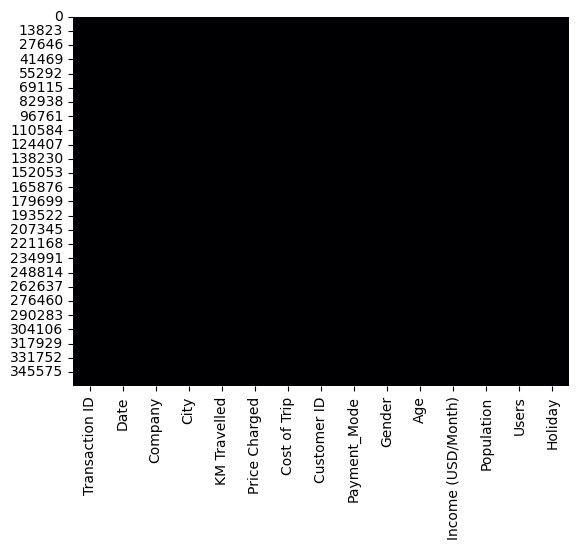

In [26]:
sns.heatmap(merged_df.isnull(),cmap = 'magma',cbar = False);

In [27]:
merged_df.describe()

Transaction ID                           Date   KM Travelled  \
count    3.593920e+05                         359392  359392.000000   
mean     1.022076e+07  2017-08-17 01:37:55.042293760      22.567254   
min      1.000001e+07            2016-01-02 00:00:00       1.900000   
25%      1.011081e+07            2016-11-23 00:00:00      12.000000   
50%      1.022104e+07            2017-09-10 00:00:00      22.440000   
75%      1.033094e+07            2018-05-12 00:00:00      32.960000   
max      1.044011e+07            2018-12-31 00:00:00      48.000000   
std      1.268058e+05                            NaN      12.233526   

       Price Charged   Cost of Trip    Customer ID            Age  \
count  359392.000000  359392.000000  359392.000000  359392.000000   
mean      423.443311     286.190113   19191.652115      35.336705   
min        15.600000      19.000000       1.000000      18.000000   
25%       206.437500     151.200000    2705.000000      25.000000   
50%       386.360000     282.480000    7459.000000      33.000000   
75%       583.660000     413.683200   36078.000000      42.000000   
max      2048.030000     691.200000   60000.000000      65.000000   
std       274.378911     157.993661   21012.412463      12.594234   

       Income (USD/Month)        Holiday  
count       359392.000000  359392.000000  
mean         15048.822937       0.051877  
min           2000.000000       0.000000  
25%           8424.000000       0.000000  
50%          14685.000000       0.000000  
75%          21035.000000       0.000000  
max          35000.000000       1.000000  
std           7969.409482       0.221778

In [28]:
merged_df['Date']

0        2016-01-08
1        2016-01-06
2        2016-01-02
3        2016-01-07
4        2016-01-03
            ...    
359387   2018-01-08
359388   2018-01-04
359389   2018-01-05
359390   2018-01-05
359391   2018-01-02
Name: Date, Length: 359392, dtype: datetime64[ns]

In [29]:
master_data = merged_df

In [118]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Company             359392 non-null  object 
 2   City                359392 non-null  object 
 3   KM Travelled        359392 non-null  float64
 4   Price Charged       359392 non-null  float64
 5   Cost of Trip        359392 non-null  float64
 6   Customer ID         359392 non-null  int64  
 7   Payment_Mode        359392 non-null  object 
 8   Gender              359392 non-null  object 
 9   Age                 359392 non-null  int64  
 10  Income (USD/Month)  359392 non-null  int64  
 11  Population          359392 non-null  object 
 12  Users               359392 non-null  object 
 13  Holiday             359392 non-null  float64
 14  Year                359392 non-null  int32  
 15  Month               359392 non-nul

In [119]:
size_bytes = master_data.memory_usage(deep=True).sum()
size_mb = size_bytes / (1024 * 1024)

print(f"DataFrame size in memory: {size_mb:.2f} MB")


DataFrame size in memory: 150.32 MB


In [30]:
master_data.dtypes

Transaction ID                 int64
Date                  datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                    object
Users                         object
Holiday                      float64
dtype: object

In [31]:
print(master_data.nunique().sort_values(ascending=False))

Transaction ID        359392
Price Charged          99176
Customer ID            46148
Income (USD/Month)     22725
Cost of Trip           16291
Date                    1095
KM Travelled             874
Age                       48
City                      19
Population                19
Users                     19
Company                    2
Payment_Mode               2
Gender                     2
Holiday                    2
dtype: int64


In [32]:
master_data['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

### Extract relevant features for subsequent analysis

In [33]:
# Derive some interested features for later analysis
master_data['Year'] = master_data['Date'].dt.year
master_data['Month'] = master_data['Date'].dt.month
master_data['Profit'] = master_data['Price Charged'] - master_data['Cost of Trip']
master_data['Profit_Rate'] = ((master_data['Price Charged'] - master_data['Cost of Trip'])/master_data['Cost of Trip'])*100
master_data['Profit_per_KM'] = master_data['Profit']/ master_data['KM Travelled']
#master_data['User_Ratio'] = master_data['Users']/master_data['Population']*100

master_data.info()

master_data = master_data.drop(master_data.columns[1], axis=1)
print(master_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date                359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  object        
 13  Users               359392 no

In [34]:
master_data['Year'].unique()

array([2016, 2017, 2018], dtype=int32)

In [35]:
3. Compare Yellow Cab and Pink Cab from Different Aspects

In this section , we compare the data of Yellow Cab and Pink Cab to answer the following questions.

3.1 What's the profit rate of Cab market? Which company has higher profit rate?

3.2 Does Yellow Cab have bigger market share than Pink Cab?

3.3 Do Customers prefer Yellow Cab to Pink Cab?

3.4 Who serves the higher income

3.5 Which company prevail in which city?

3.6 Can Yellow Cab make more profit in the future?

As some figures and tables have implications for different questions, we will analyze step-by-step and then make a summary answer at last. 

SyntaxError: unterminated string literal (detected at line 5) (867706966.py, line 5)

### Average Feature Comparison Between Pink Cab and Yellow Cab

In [ ]:
Pink = master_data[master_data['Company'] == 'Pink Cab'].describe().T
Yellow = master_data[master_data['Company'] == 'Yellow Cab'].describe().T
colors = ['#F93822','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(Pink[['mean']],annot = True,cmap = 'viridis',linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Pink Cab');

plt.subplot(1,2,2)
sns.heatmap(Yellow[['mean']],annot = True,cmap = 'viridis',linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Yellow Cab');

fig.tight_layout(pad = 0)

## 2. Exploratory Data Analysis


#### Overall: Company-wise comparison

Hypothesis 1:
*“The distribution of profit-related metrics (e.g., profit, profit rate, profit per km) significantly differs between Pink Cab and Yellow Cab.”*

Possible Investigation:

* Does one company have a higher average profit rate than the other?
* Is cost structure (Cost of Trip) similar across both?
* Yellow Cab serves more long-distance or high-cost trips while Pink Cab operates shorter, lower-cost routes.
---

#### Gender-wise for each company

Hypothesis 2:
*“Profit metrics vary by customer gender within each company.”*

Possible Investigation:

* Do male or female customers tend to result in higher profitability?
* Are there differences in pricing patterns by gender?

---

#### Holiday effect for Yellow and Pink

Hypothesis 3:
*“Cab profitability increases on holidays due to higher demand.”*

Possible Investigation:

* Is the cost or price higher during holidays?
* Is profit or profit per km significantly higher on holidays?

---

#### City-wise

Hypothesis 4:
*“Certain cities contribute more to profit due to either higher price charged or better margins.”*

Possible Investigation:

* Are profit per km or profit rates consistent across cities?
* Which cities are the most/least profitable?

---

#### Year-wise trend

Hypothesis 5:
*“There is a seasonal or temporal trend in cab company performance, such as changing profit rates or cost structures over years.”*

Possible Investigation:

* Is there a steady increase/decrease in profit over years?
* Did cost of trips or price charged fluctuate significantly?

---

#### Segmented customer behavior

Hypothesis 6 (Cross-cutting):
*“Customer segments (defined by gender, city, or holiday usage) exhibit distinct behavior in terms of trip cost, pricing, and profitability.”*

Possible Investigation:

* Are any segments more cost-efficient for the company?
* Is there a correlation between gender, location, and profit margin?

---


<Axes: xlabel='KM Travelled', ylabel='Count'>

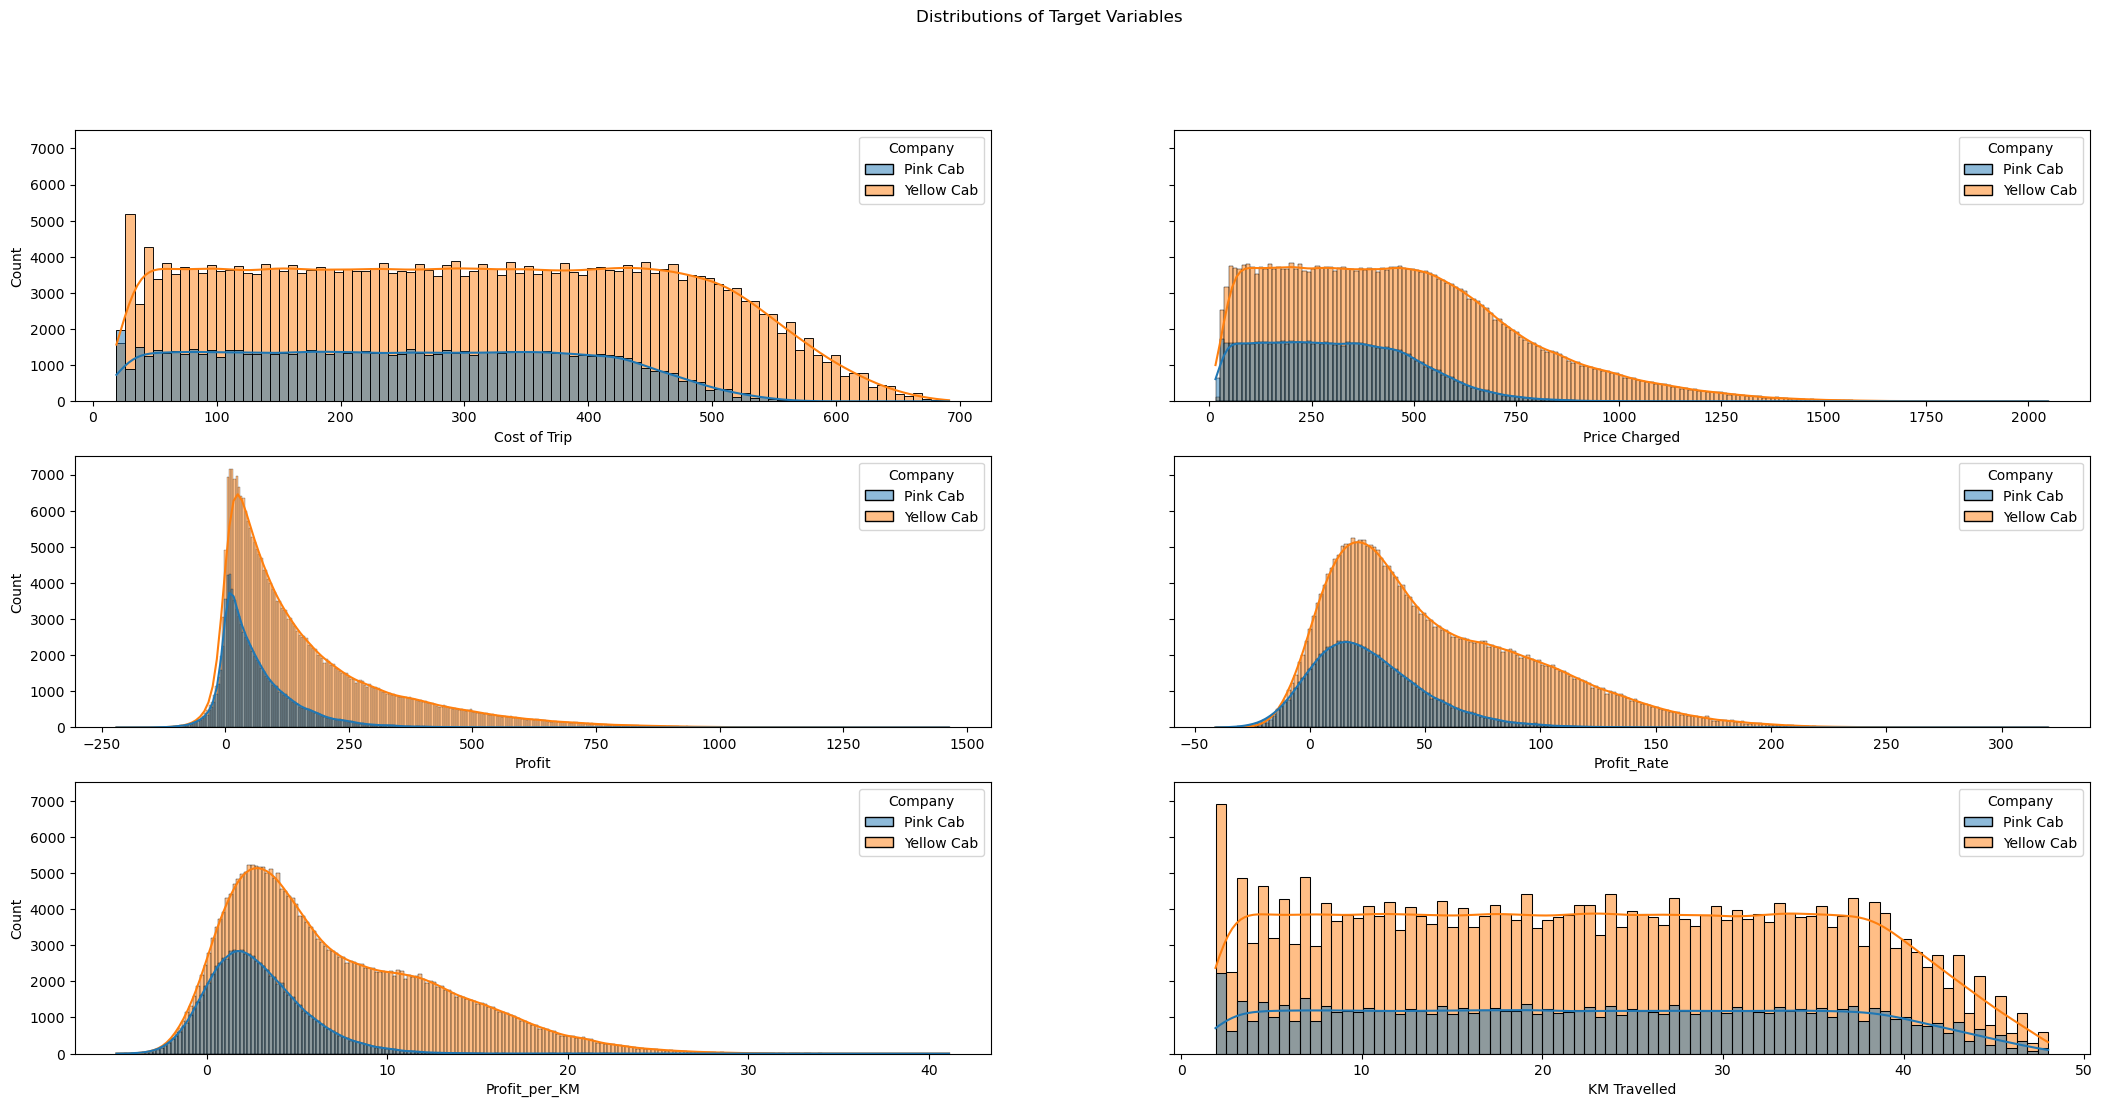

In [71]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=master_data , x='Cost of Trip' ,kde =True, hue="Company")
sns.histplot(ax=axes[0,1], data=master_data , x='Price Charged' , kde = True , hue="Company")
sns.histplot(ax=axes[1,0], data=master_data , x='Profit' , kde = True , hue="Company") 
sns.histplot(ax=axes[1,1], data=master_data , x='Profit_Rate' , kde = True , hue="Company")
sns.histplot(ax=axes[2,0], data=master_data , x='Profit_per_KM' , kde = True , hue="Company")
sns.histplot(ax=axes[2,1], data=master_data , x='KM Travelled' , kde = True , hue="Company")


In [102]:
mask1 = (master_data["Company"] == 'Pink Cab')
Pink_cab_df = master_data[mask1]

mask2 = (master_data["Company"] == 'Yellow Cab')
Yellow_cab_df = master_data[mask2]

<Axes: xlabel='Profit_per_KM', ylabel='Count'>

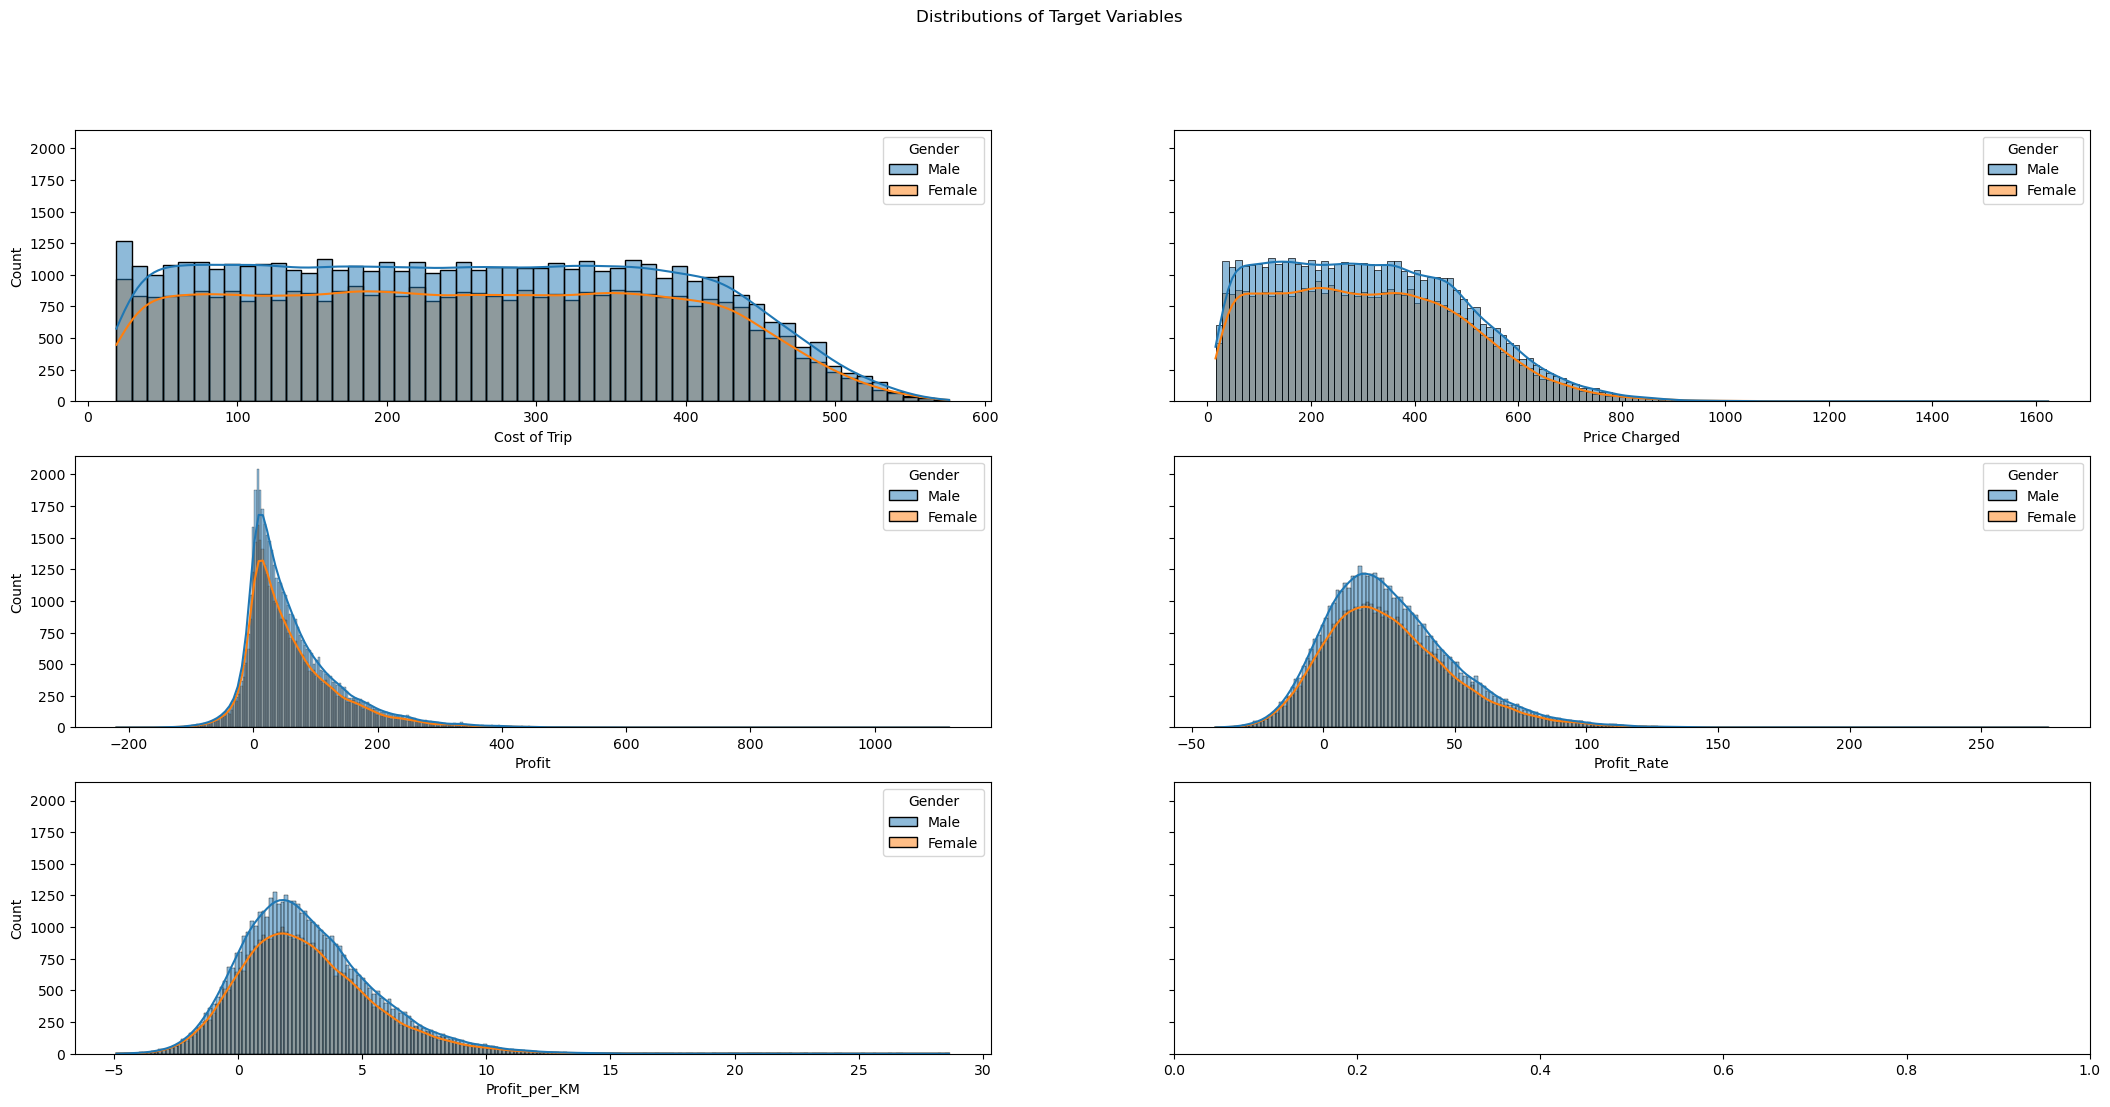

In [44]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Pink_cab_df , x='Cost of Trip' ,kde =True, hue="Gender")
sns.histplot(ax=axes[0,1], data=Pink_cab_df , x='Price Charged' , kde = True , hue="Gender")
sns.histplot(ax=axes[1,0], data=Pink_cab_df , x='Profit' , kde = True , hue="Gender") 
sns.histplot(ax=axes[1,1], data=Pink_cab_df , x='Profit_Rate' , kde = True , hue="Gender")
sns.histplot(ax=axes[2,0], data=Pink_cab_df , x='Profit_per_KM' , kde = True , hue="Gender")

<Axes: xlabel='Profit_per_KM', ylabel='Count'>

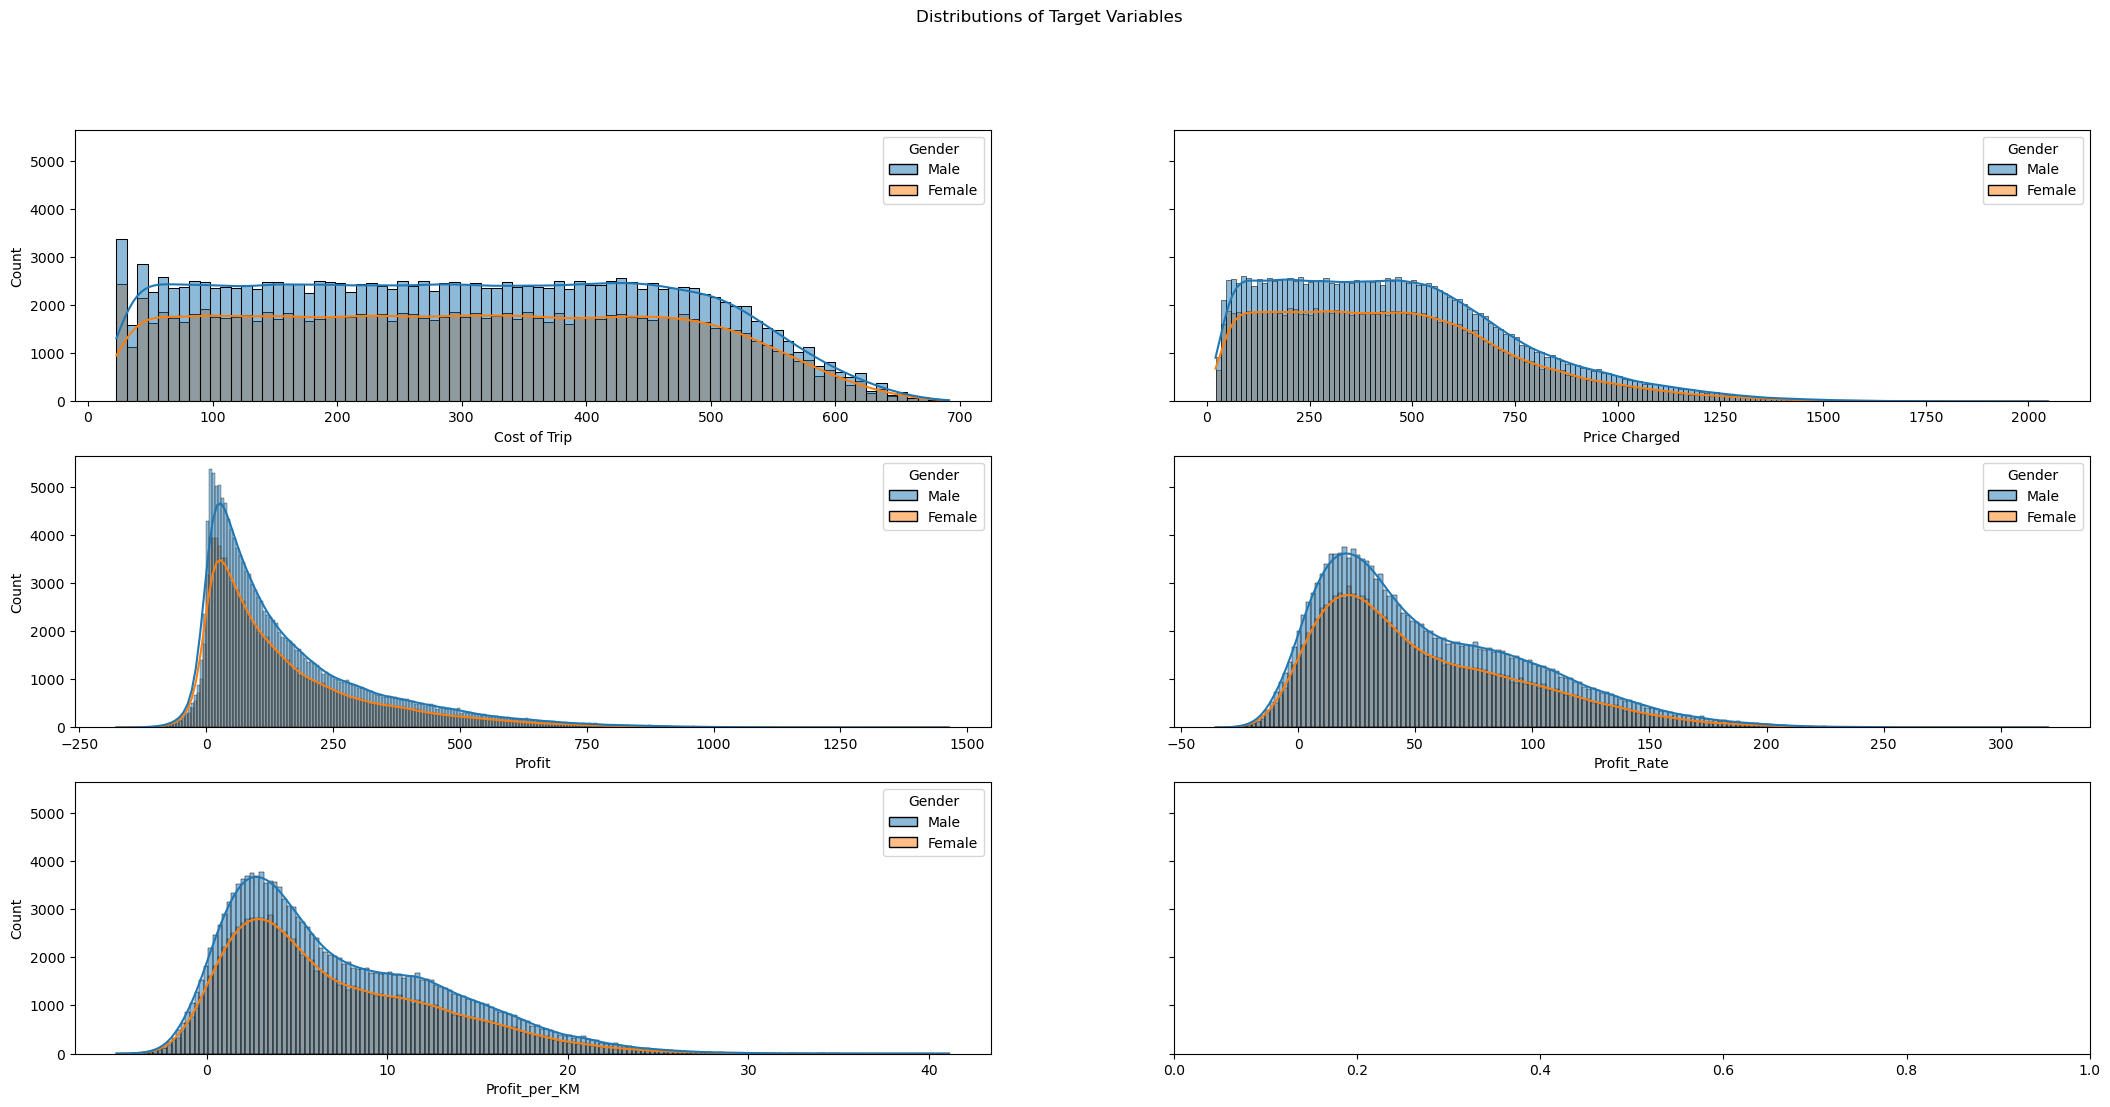

In [45]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Yellow_cab_df , x='Cost of Trip' ,kde =True, hue="Gender")
sns.histplot(ax=axes[0,1], data=Yellow_cab_df , x='Price Charged' , kde = True , hue="Gender")
sns.histplot(ax=axes[1,0], data=Yellow_cab_df , x='Profit' , kde = True , hue="Gender") 
sns.histplot(ax=axes[1,1], data=Yellow_cab_df , x='Profit_Rate' , kde = True , hue="Gender")
sns.histplot(ax=axes[2,0], data=Yellow_cab_df , x='Profit_per_KM' , kde = True , hue="Gender")

<Axes: xlabel='Profit_per_KM', ylabel='Count'>

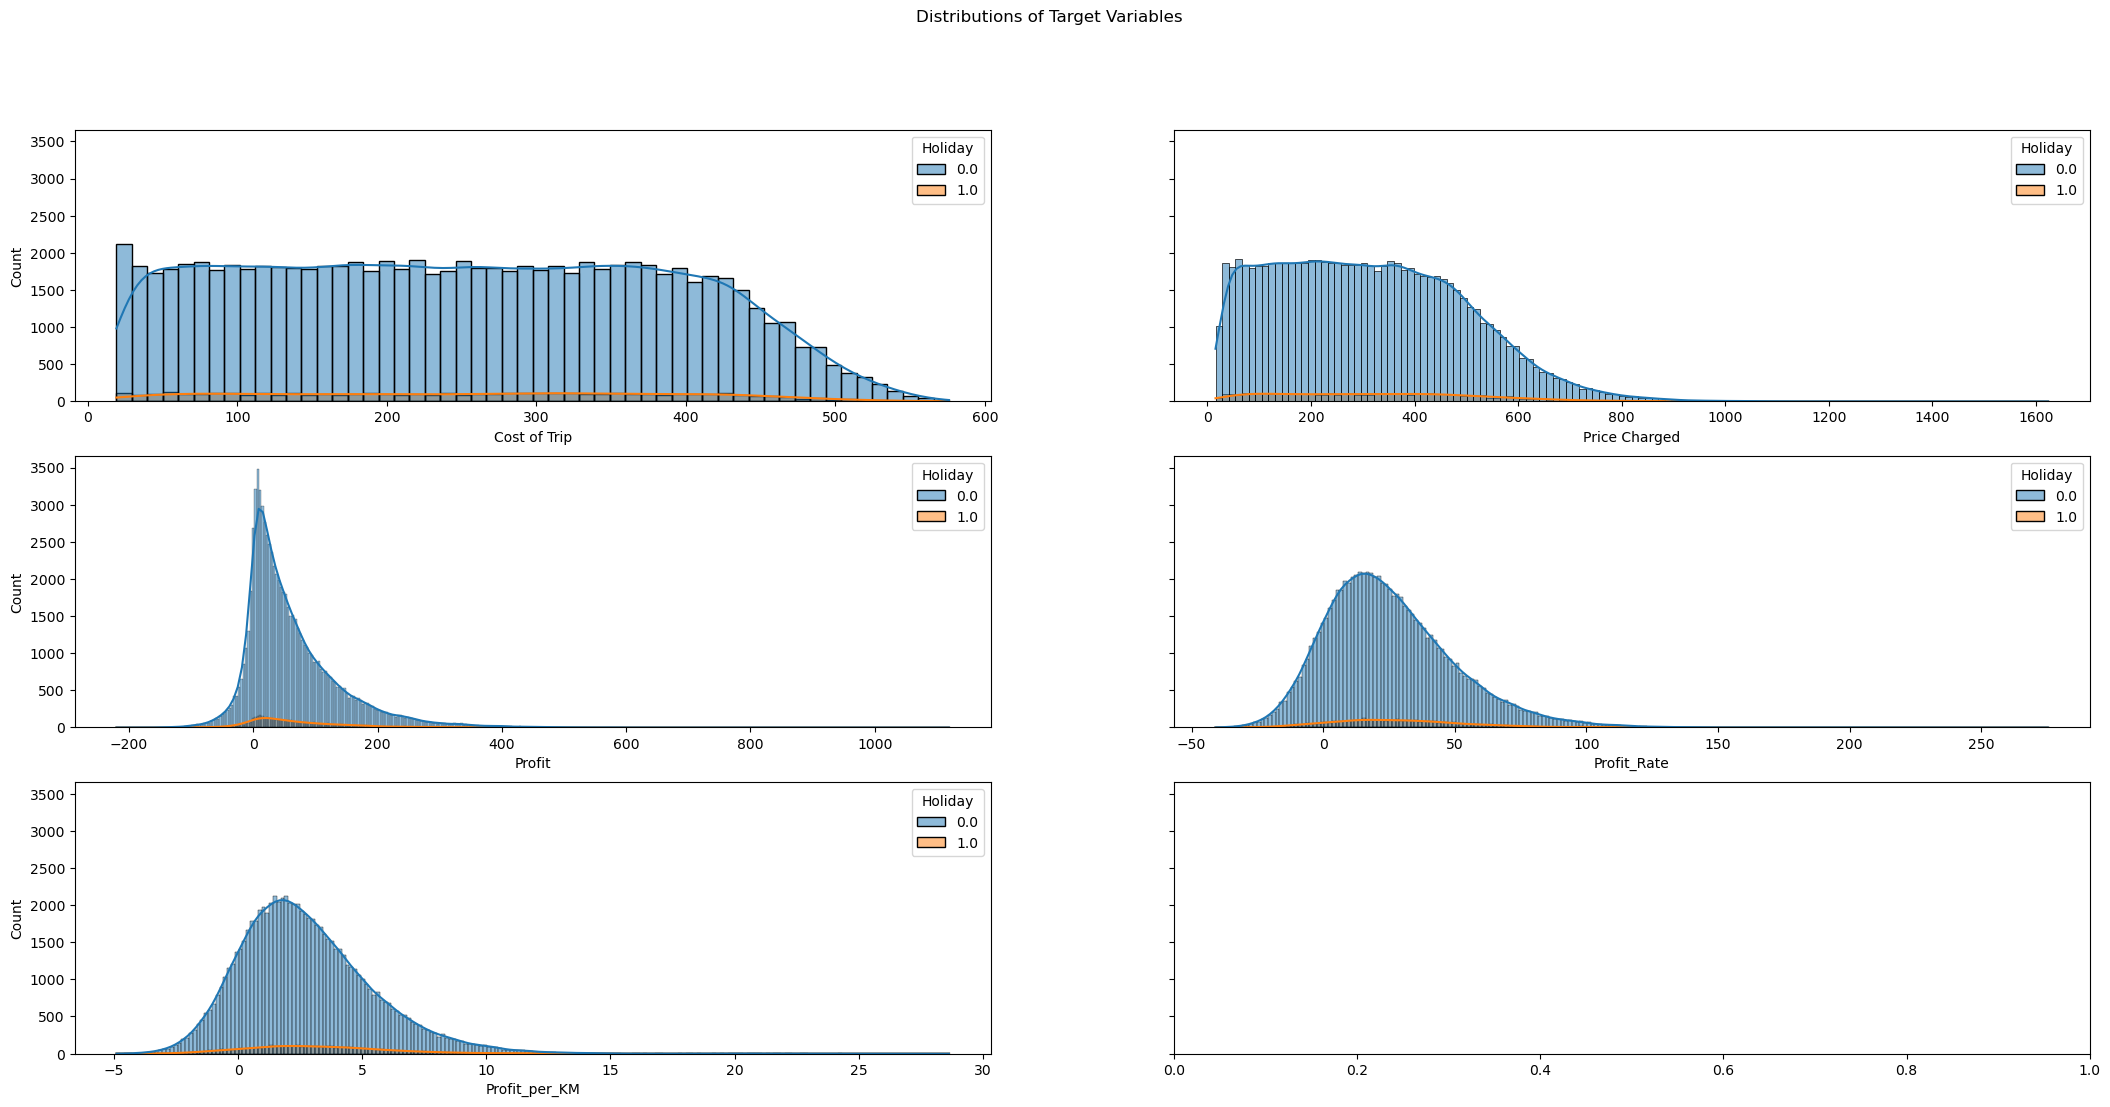

In [46]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Pink_cab_df , x='Cost of Trip' ,kde =True, hue="Holiday")
sns.histplot(ax=axes[0,1], data=Pink_cab_df , x='Price Charged' , kde = True , hue="Holiday")
sns.histplot(ax=axes[1,0], data=Pink_cab_df , x='Profit' , kde = True , hue="Holiday") 
sns.histplot(ax=axes[1,1], data=Pink_cab_df , x='Profit_Rate' , kde = True , hue="Holiday")
sns.histplot(ax=axes[2,0], data=Pink_cab_df , x='Profit_per_KM' , kde = True , hue="Holiday")

<Axes: xlabel='Profit_per_KM', ylabel='Count'>

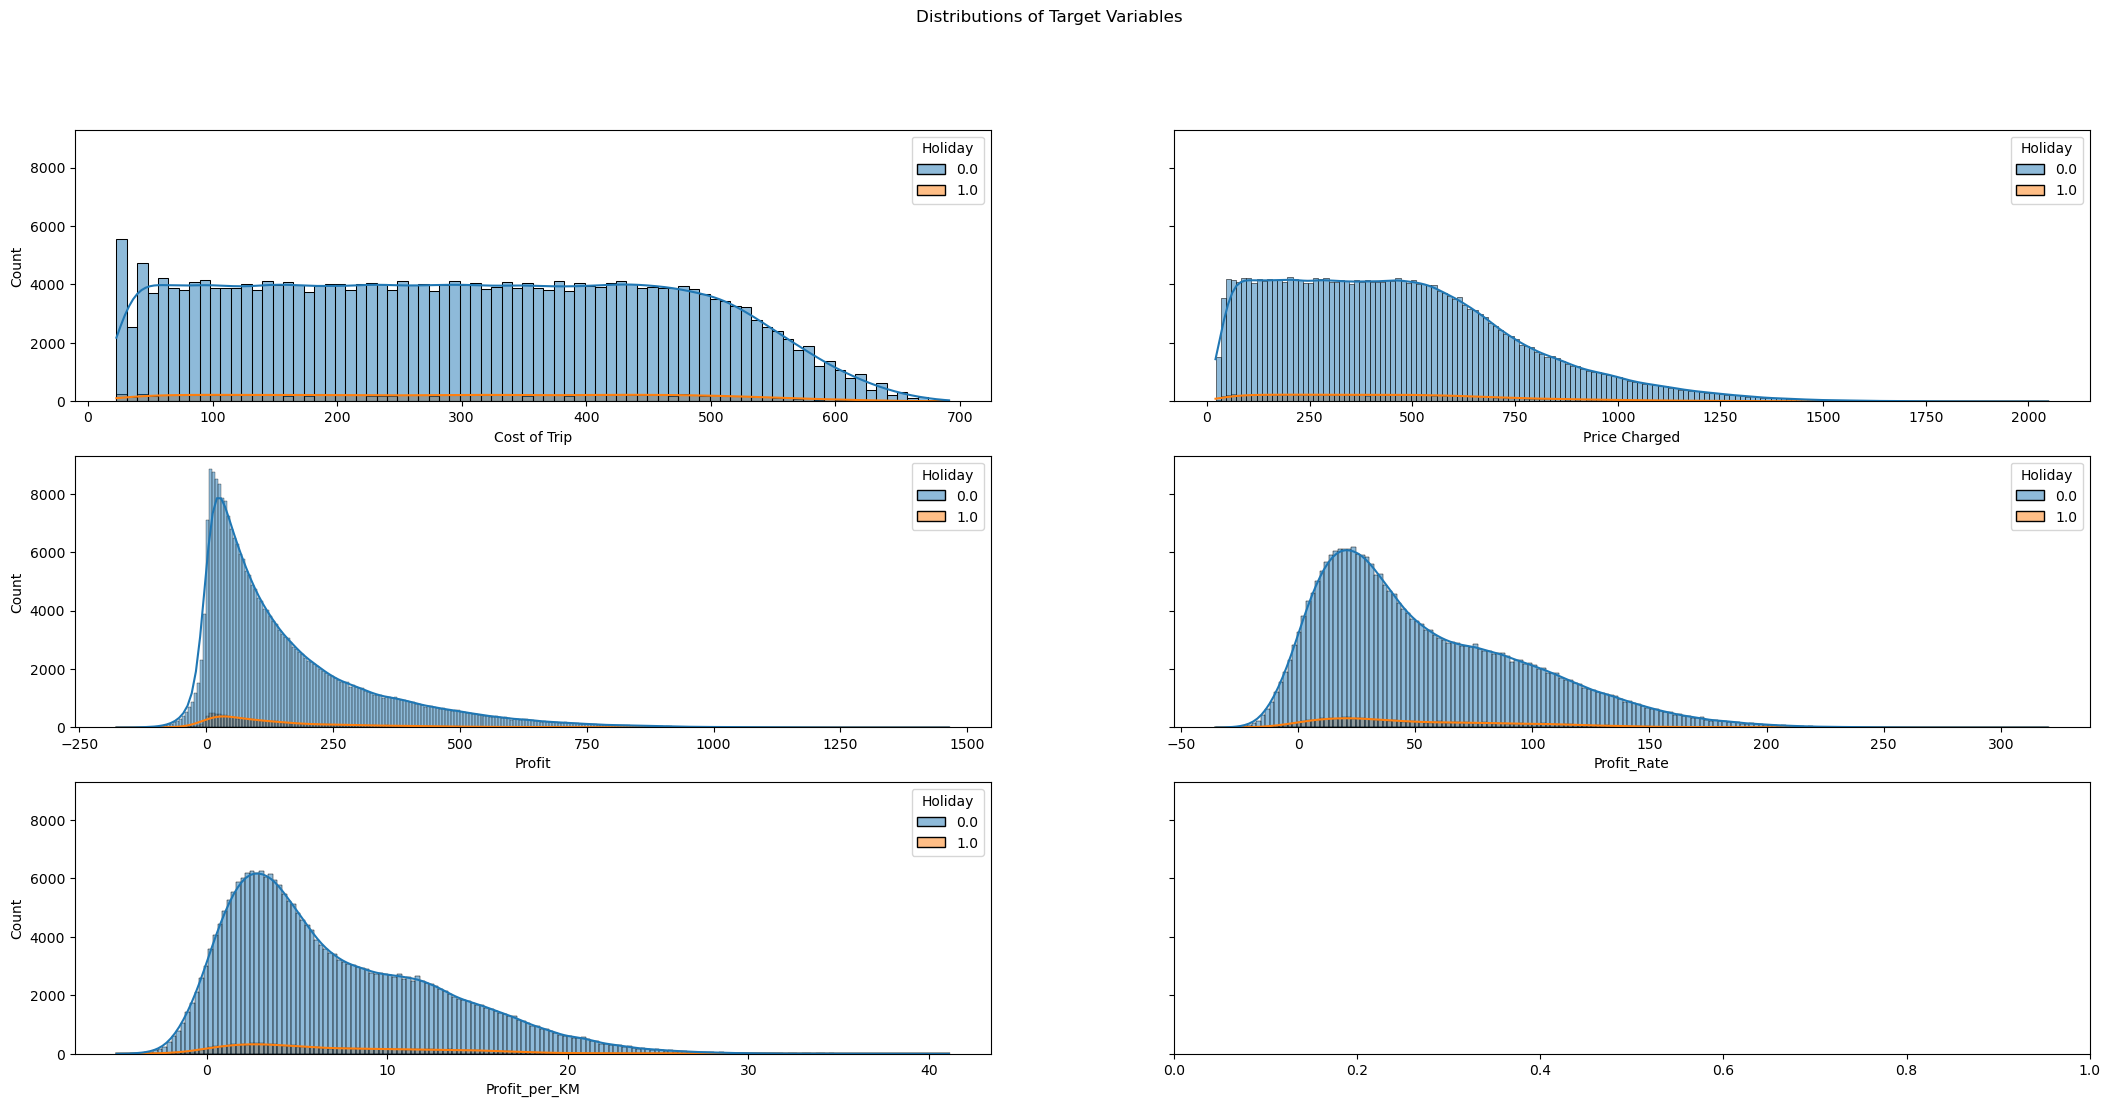

In [47]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Yellow_cab_df , x='Cost of Trip' ,kde =True, hue="Holiday")
sns.histplot(ax=axes[0,1], data=Yellow_cab_df , x='Price Charged' , kde = True , hue="Holiday")
sns.histplot(ax=axes[1,0], data=Yellow_cab_df , x='Profit' , kde = True , hue="Holiday") 
sns.histplot(ax=axes[1,1], data=Yellow_cab_df , x='Profit_Rate' , kde = True , hue="Holiday")
sns.histplot(ax=axes[2,0], data=Yellow_cab_df , x='Profit_per_KM' , kde = True , hue="Holiday")

<Axes: xlabel='Profit_per_KM', ylabel='Count'>

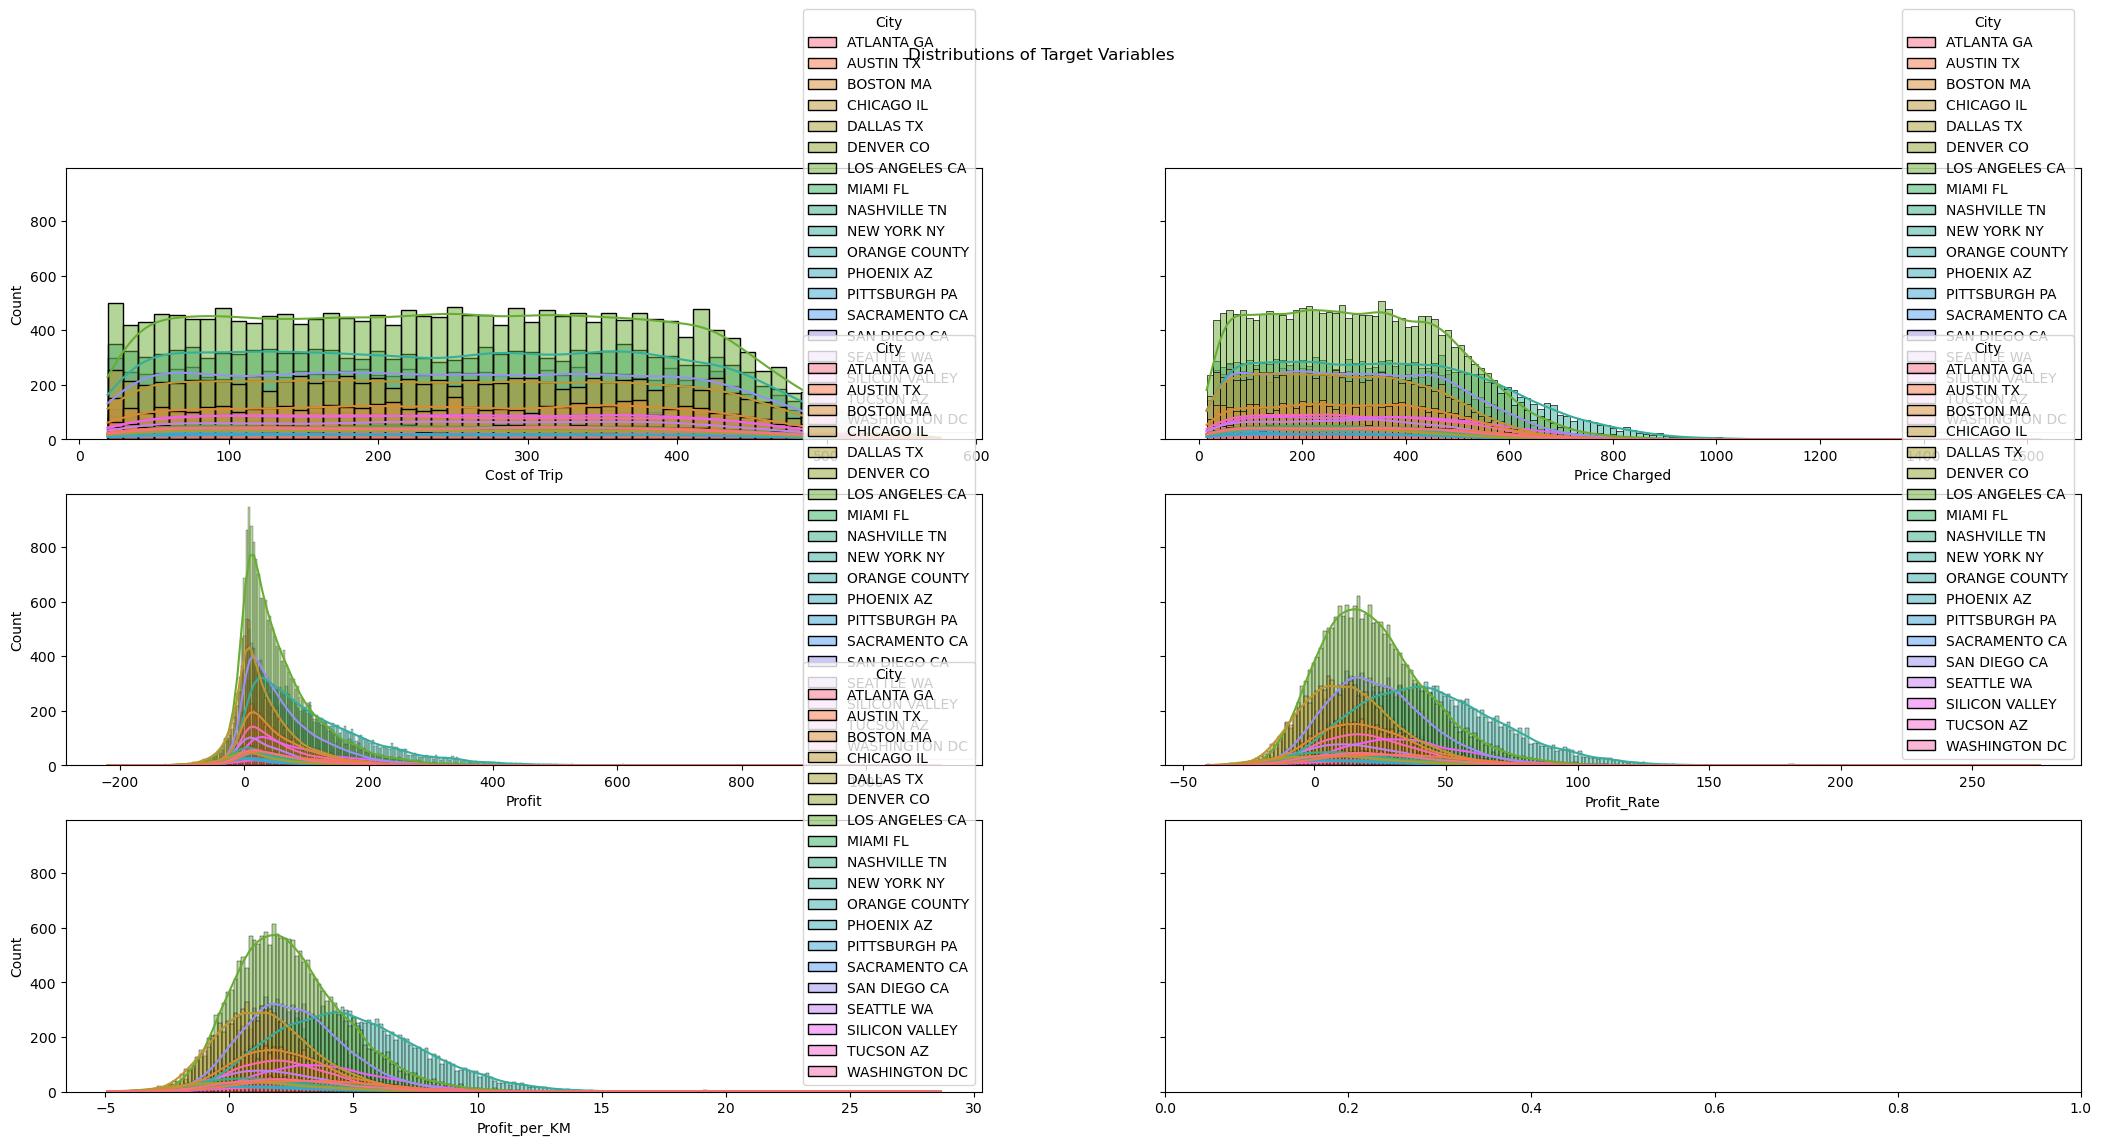

In [48]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Pink_cab_df , x='Cost of Trip' ,kde =True, hue="City")
sns.histplot(ax=axes[0,1], data=Pink_cab_df , x='Price Charged' , kde = True , hue="City")
sns.histplot(ax=axes[1,0], data=Pink_cab_df , x='Profit' , kde = True , hue="City") 
sns.histplot(ax=axes[1,1], data=Pink_cab_df , x='Profit_Rate' , kde = True , hue="City")
sns.histplot(ax=axes[2,0], data=Pink_cab_df , x='Profit_per_KM' , kde = True , hue="City")

<Axes: xlabel='Profit_per_KM', ylabel='Count'>

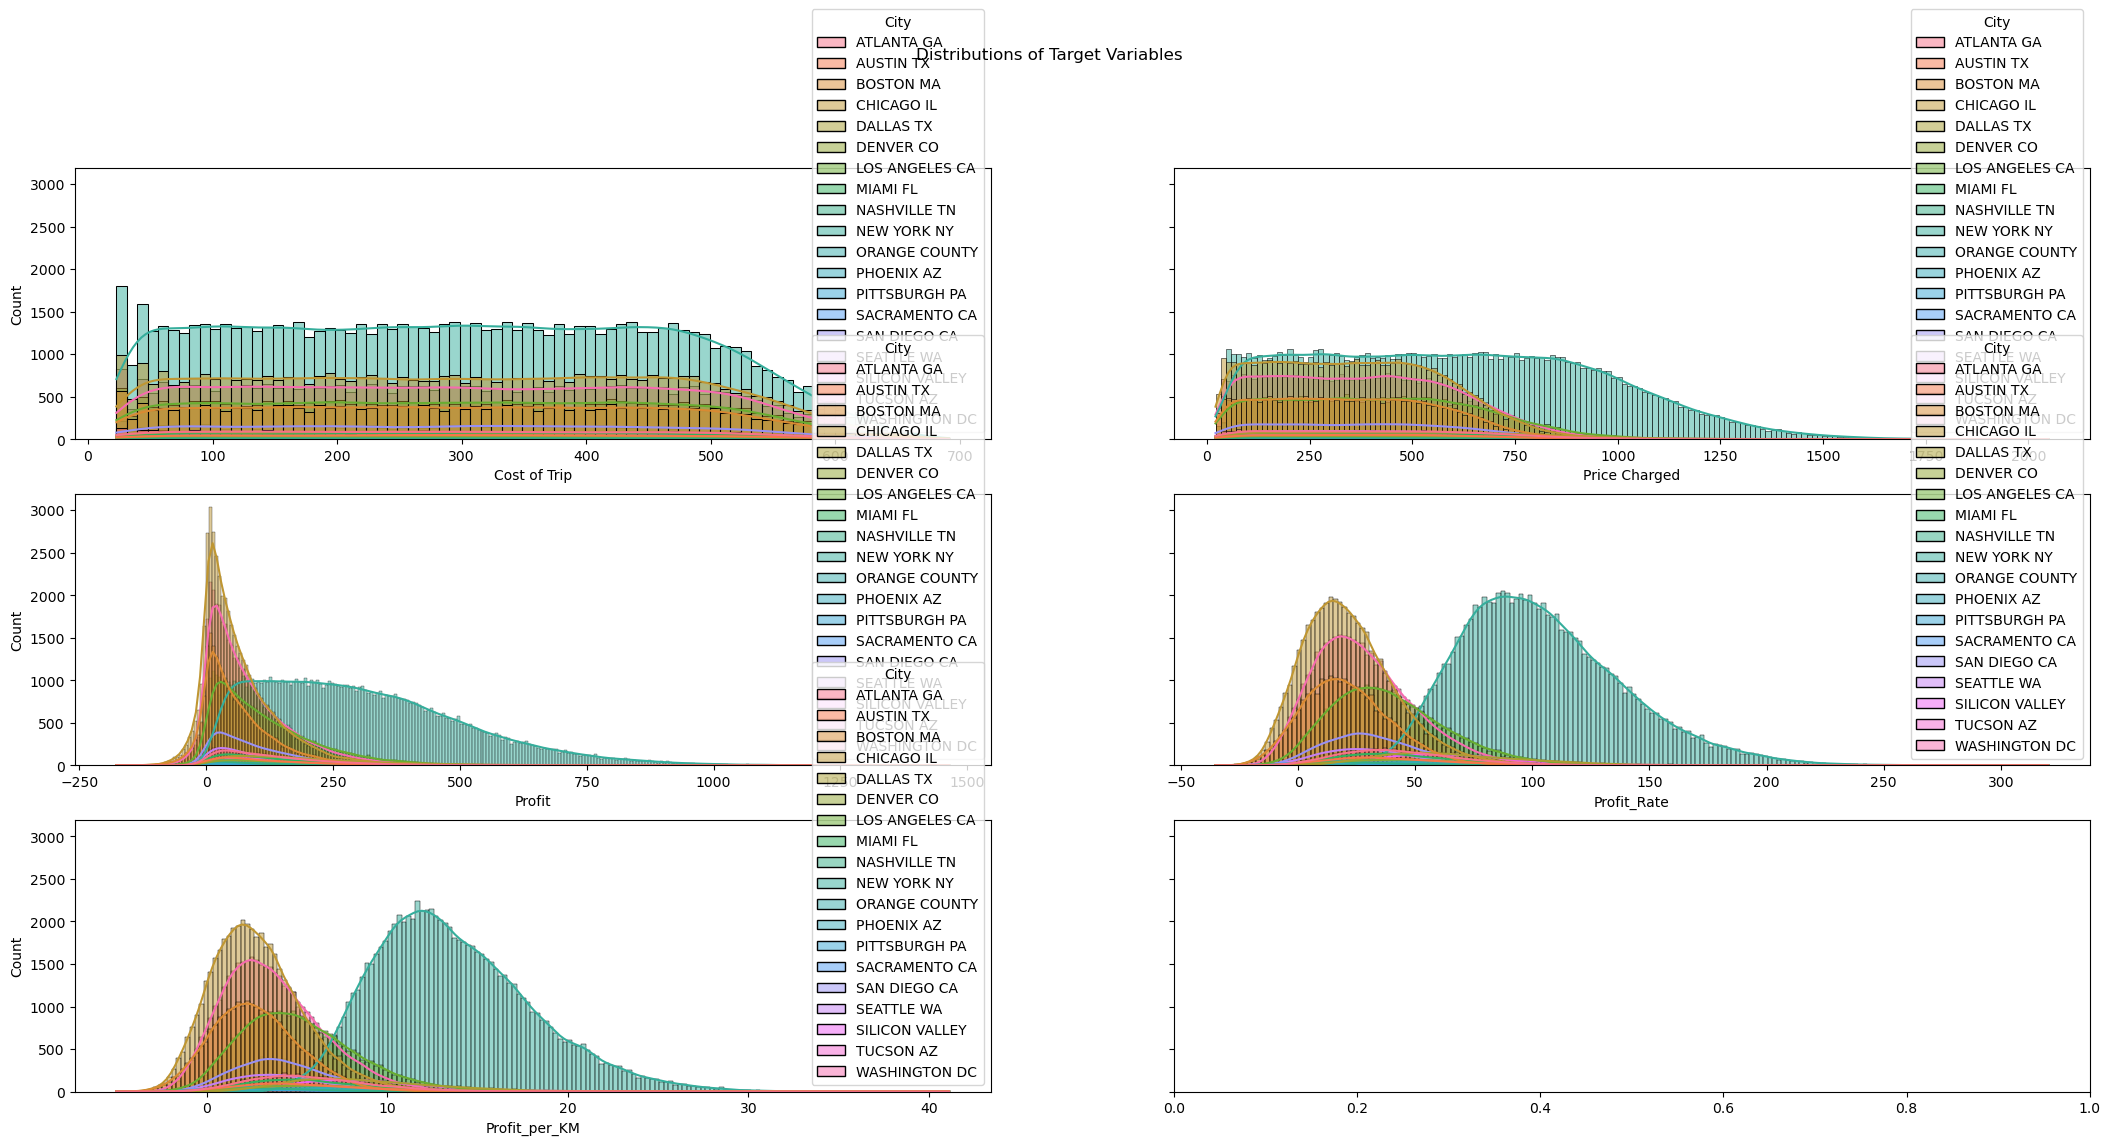

In [49]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Yellow_cab_df , x='Cost of Trip' ,kde =True, hue="City")
sns.histplot(ax=axes[0,1], data=Yellow_cab_df , x='Price Charged' , kde = True , hue="City")
sns.histplot(ax=axes[1,0], data=Yellow_cab_df , x='Profit' , kde = True , hue="City") 
sns.histplot(ax=axes[1,1], data=Yellow_cab_df , x='Profit_Rate' , kde = True , hue="City")
sns.histplot(ax=axes[2,0], data=Yellow_cab_df , x='Profit_per_KM' , kde = True , hue="City")

<Axes: xlabel='Profit_per_KM', ylabel='Count'>

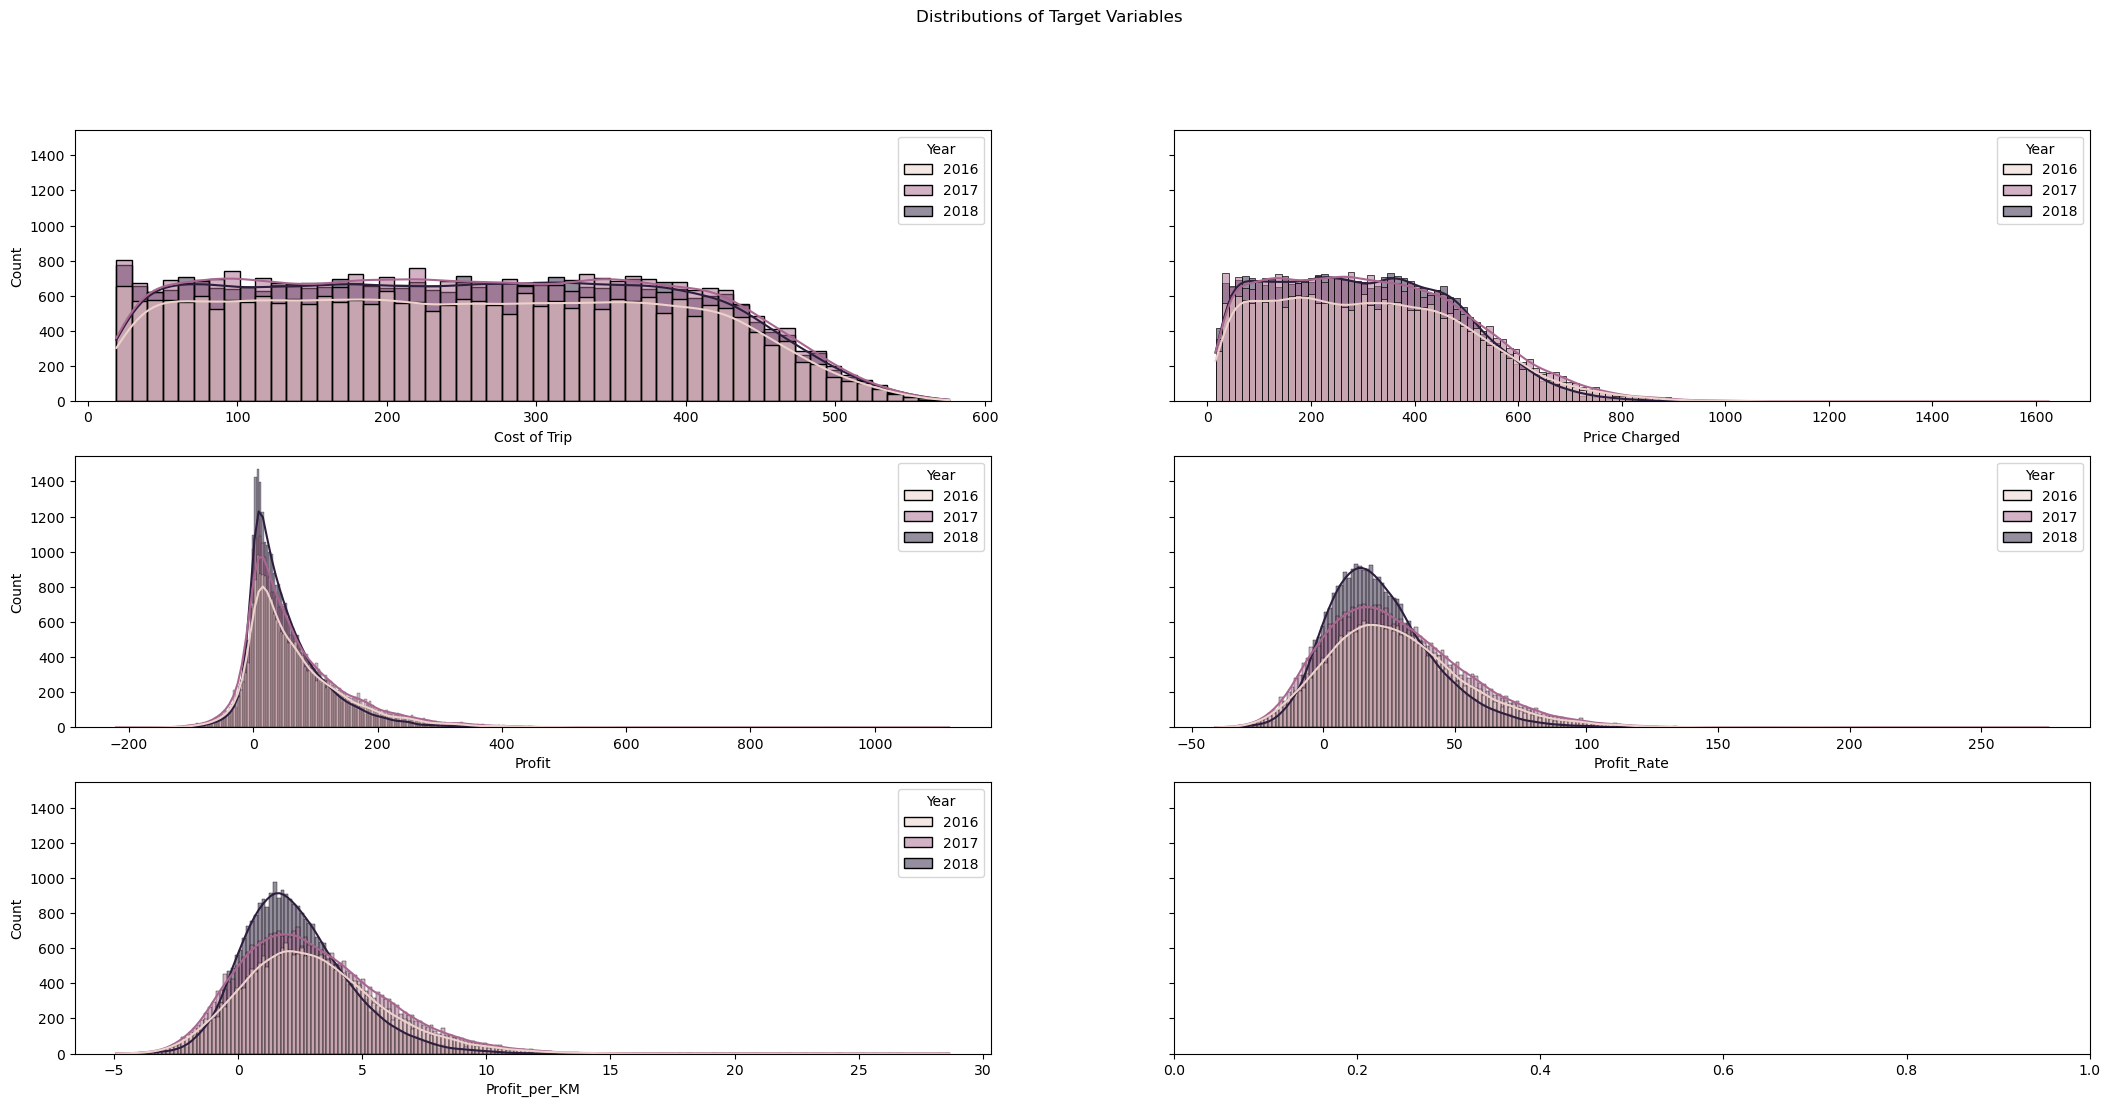

In [50]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Pink_cab_df , x='Cost of Trip' ,kde =True, hue="Year")
sns.histplot(ax=axes[0,1], data=Pink_cab_df, x='Price Charged' , kde = True , hue="Year")
sns.histplot(ax=axes[1,0], data=Pink_cab_df , x='Profit' , kde = True , hue="Year") 
sns.histplot(ax=axes[1,1], data=Pink_cab_df , x='Profit_Rate' , kde = True , hue="Year")
sns.histplot(ax=axes[2,0], data=Pink_cab_df , x='Profit_per_KM' , kde = True , hue="Year")

<Axes: xlabel='Profit_per_KM', ylabel='Count'>

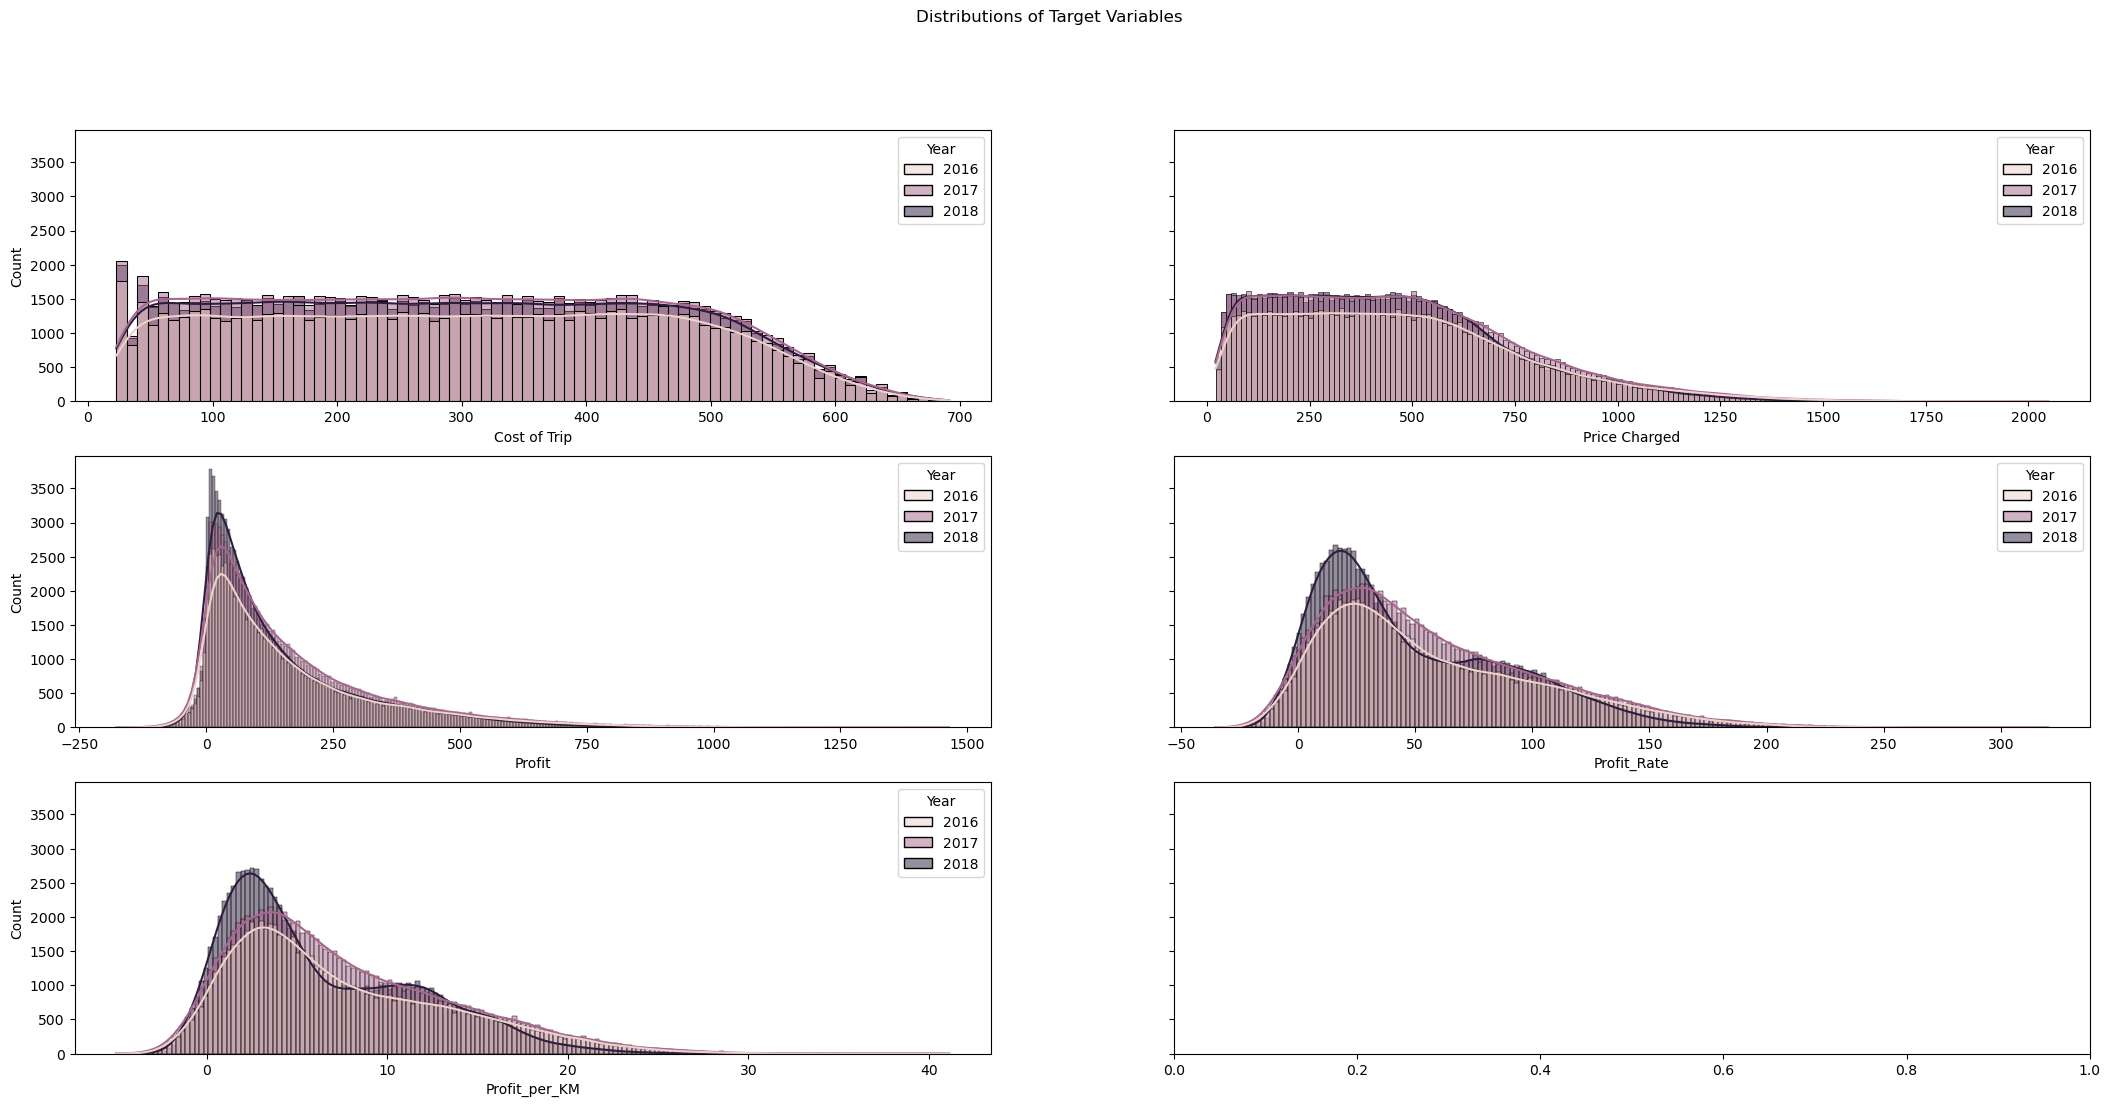

In [51]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Yellow_cab_df , x='Cost of Trip' ,kde =True, hue="Year")
sns.histplot(ax=axes[0,1], data=Yellow_cab_df, x='Price Charged' , kde = True , hue="Year")
sns.histplot(ax=axes[1,0], data=Yellow_cab_df , x='Profit' , kde = True , hue="Year") 
sns.histplot(ax=axes[1,1], data=Yellow_cab_df , x='Profit_Rate' , kde = True , hue="Year")
sns.histplot(ax=axes[2,0], data=Yellow_cab_df , x='Profit_per_KM' , kde = True , hue="Year")

<Axes: xlabel='Profit_per_KM', ylabel='Count'>

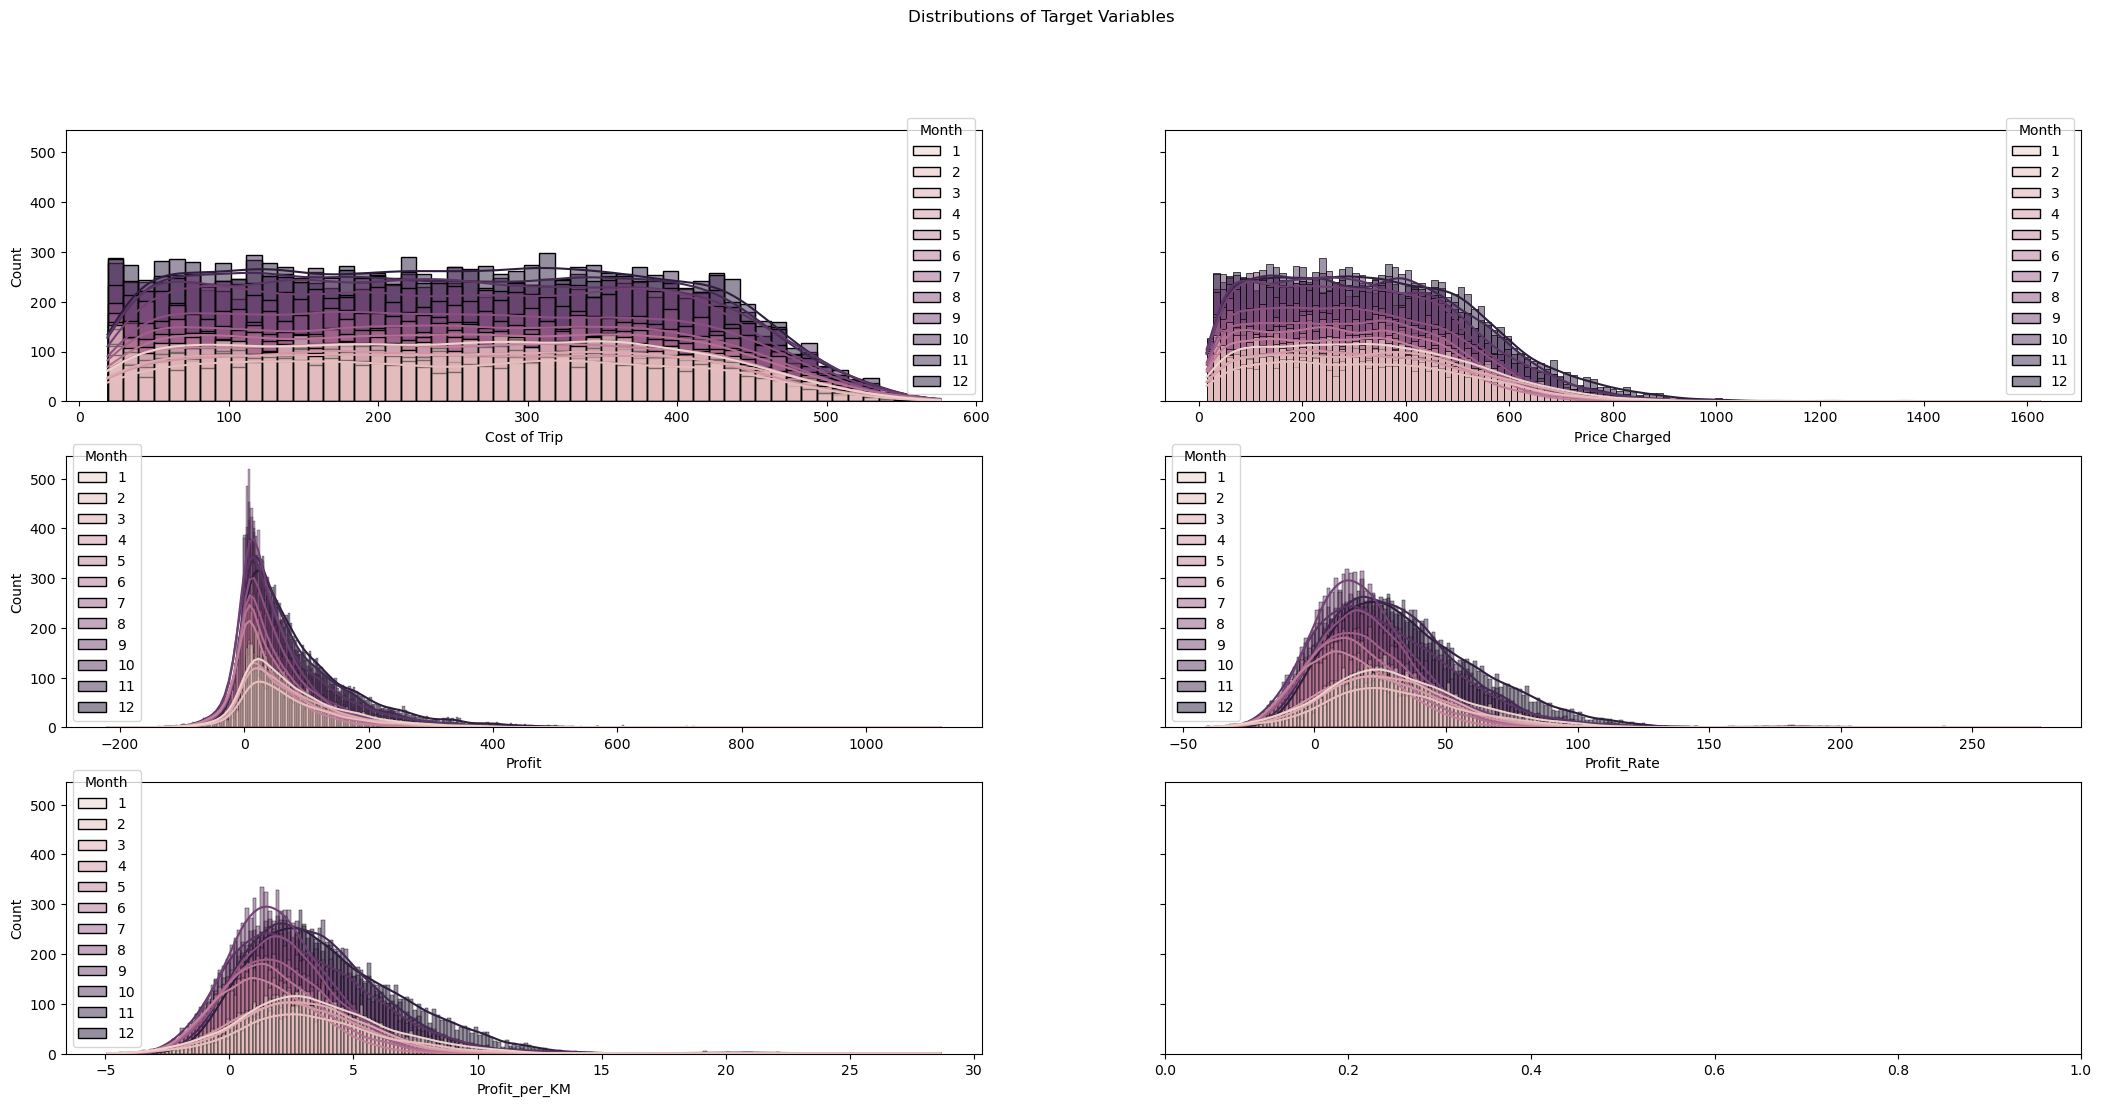

In [52]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Pink_cab_df, x='Cost of Trip' ,kde =True, hue="Month")
sns.histplot(ax=axes[0,1], data=Pink_cab_df, x='Price Charged' , kde = True , hue="Month")
sns.histplot(ax=axes[1,0], data=Pink_cab_df , x='Profit' , kde = True , hue="Month") 
sns.histplot(ax=axes[1,1], data=Pink_cab_df , x='Profit_Rate' , kde = True , hue="Month")
sns.histplot(ax=axes[2,0], data=Pink_cab_df , x='Profit_per_KM' , kde = True , hue="Month")

<Axes: xlabel='Profit_per_KM', ylabel='Count'>

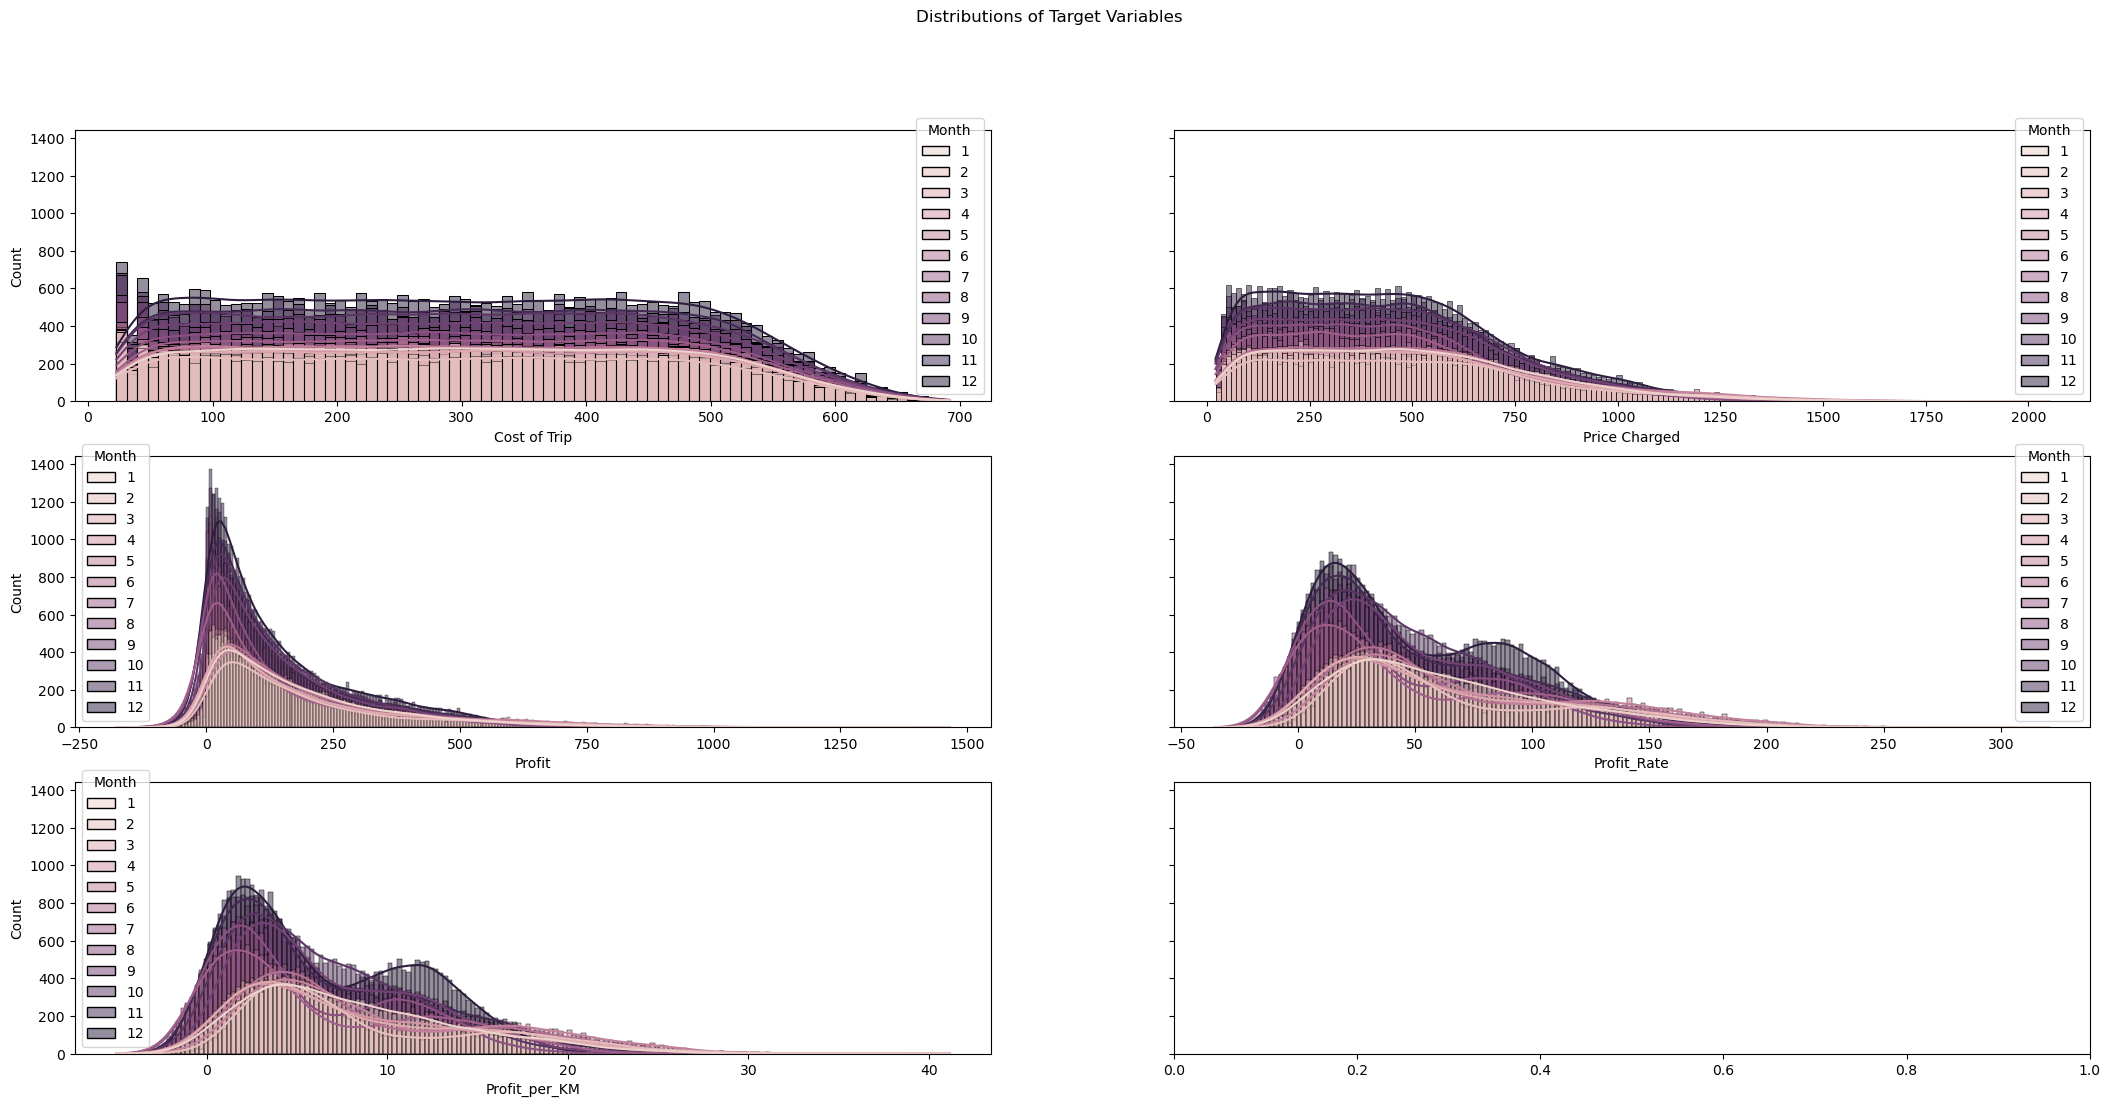

In [53]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Yellow_cab_df, x='Cost of Trip' ,kde =True, hue="Month")
sns.histplot(ax=axes[0,1], data=Yellow_cab_df, x='Price Charged' , kde = True , hue="Month")
sns.histplot(ax=axes[1,0], data=Yellow_cab_df , x='Profit' , kde = True , hue="Month") 
sns.histplot(ax=axes[1,1], data=Yellow_cab_df , x='Profit_Rate' , kde = True , hue="Month")
sns.histplot(ax=axes[2,0], data=Yellow_cab_df , x='Profit_per_KM' , kde = True , hue="Month")

Selects all columns in the DataFrame that are of type 'object' — usually string columns.

These are typically the columns that contain categorical text data.

Fits the LabelEncoder to the column's unique string values.

Transforms them into integer codes.

Overwrites the column with these new encoded values.

In [72]:
col = list(master_data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(master_data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)


Categorical Features : Company Payment_Mode Gender Holiday Year
Numerical Features : Transaction ID City KM Travelled Price Charged Cost of Trip Customer ID Age Income (USD/Month) Population Users Month Profit Profit_Rate Profit_per_KM


In [74]:
data_encoded = master_data.copy(deep=True)

In [106]:
for col in data_encoded.select_dtypes(include='object').columns:
    data_encoded[col] = pd.get_dummies(data_encoded[col],drop_first=True)


In [107]:
data_encoded.head()

Transaction ID  Company  City  KM Travelled  Price Charged  Cost of Trip  \
0        10000011        0     0         30.45         370.95       313.635   
1        10000012        0     0         28.62         358.52       334.854   
2        10000013        0     0          9.04         125.20        97.632   
3        10000014        0     0         33.17         377.40       351.602   
4        10000015        0     0          8.73         114.62        97.776   

   Customer ID  Payment_Mode  Gender  Age  Income (USD/Month)  Population  \
0        29290             0       1   28               10813          15   
1        27703             0       1   27                9237          15   
2        28712             1       1   53               11242          15   
3        28020             1       1   23               23327          15   
4        27182             0       1   33                8536          15   

   Users  Holiday  Year  Month  Profit  Profit_Rate  Profit_per_KM  
0      8      0.0  2016      1  57.315    18.274427       1.882266  
1      8      0.0  2016      1  23.666     7.067558       0.826904  
2      8      0.0  2016      1  27.568    28.236644       3.049558  
3      8      0.0  2016      1  25.798     7.337273       0.777751  
4      8      0.0  2016      1  16.844    17.227131       1.929439

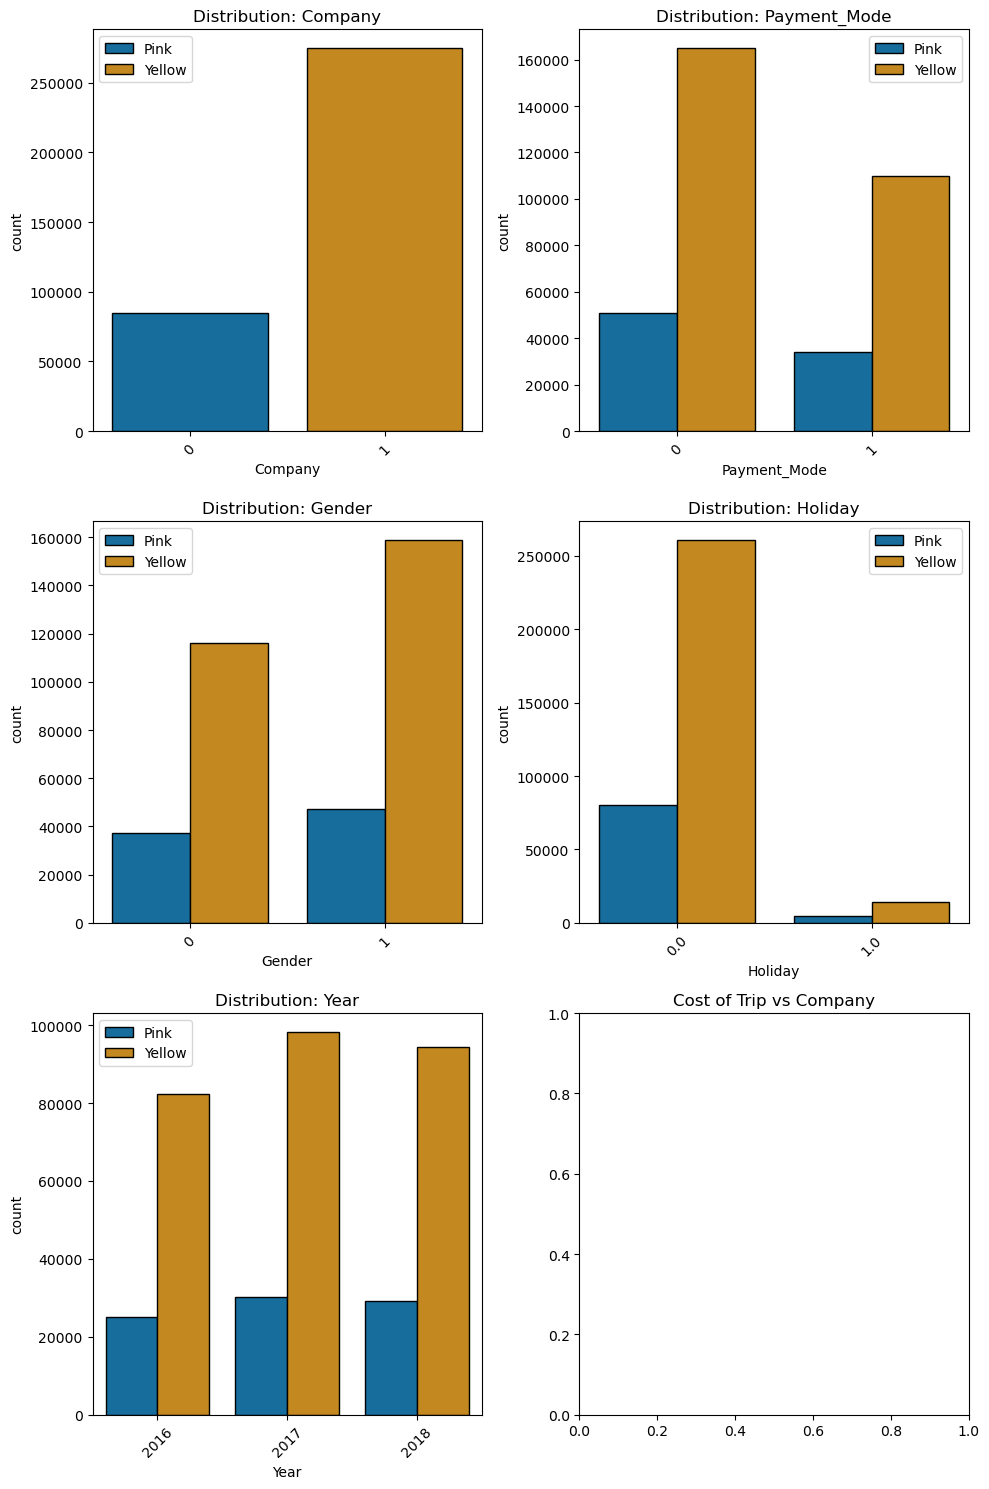

In [108]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
axes = ax.flatten()  # Flatten the array of axes for easy iteration
# Define the color palette using Seaborn's color_palette function
colors = sns.color_palette("colorblind")

for i in range(len(categorical_features)):
    sns.countplot(
        x=categorical_features[i],
        data=data_encoded,
        hue='Company',
        palette=colors,
        edgecolor='black',
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution: {categorical_features[i]}')
    axes[i].tick_params(axis='x', rotation=45)
    title = numerical_features[i] + ' vs Company'
    axes[i].legend(['Pink','Yellow'])
    plt.title(title);

plt.tight_layout()
plt.show()


In [109]:
mask3 = (data_encoded["Company"] == 0)
Pink_cab = data_encoded[mask3]
#print(Pink_cab)
mask4 = (data_encoded["Company"] == 1)
Yellow_cab = data_encoded[mask4]

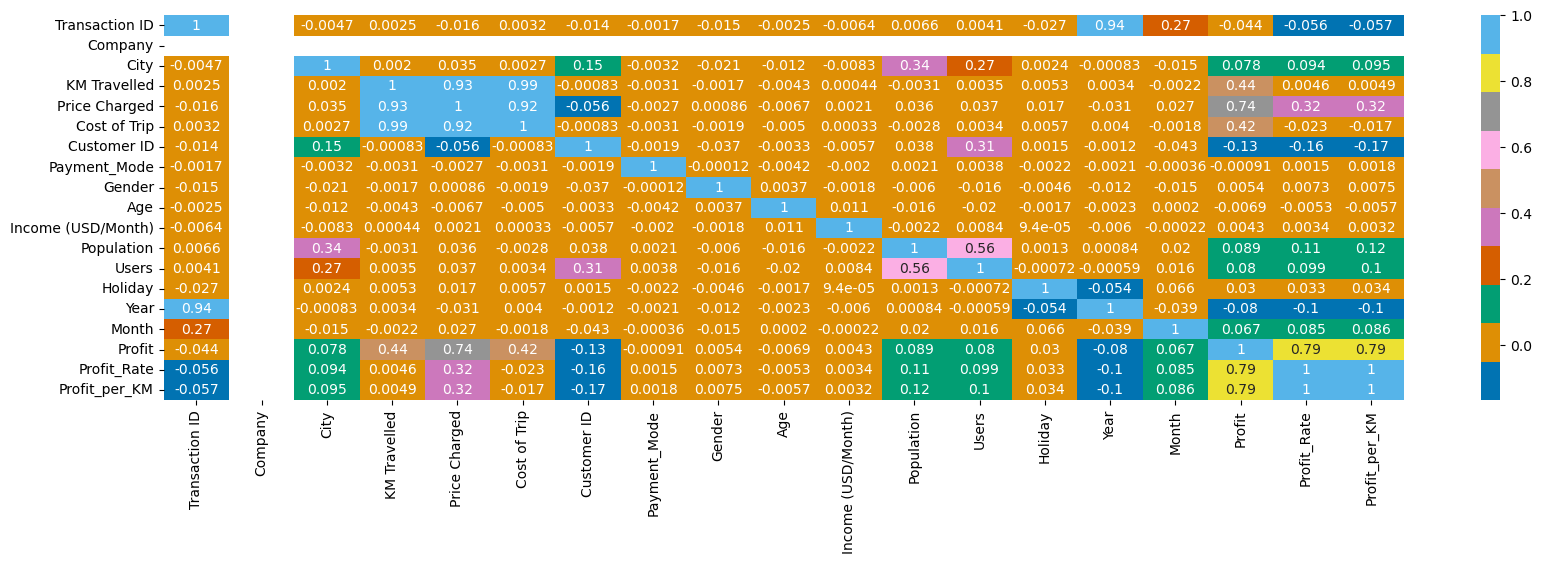

In [110]:
plt.figure(figsize = (20,5))
sns.heatmap(Pink_cab.corr(),cmap = colors,annot = True);


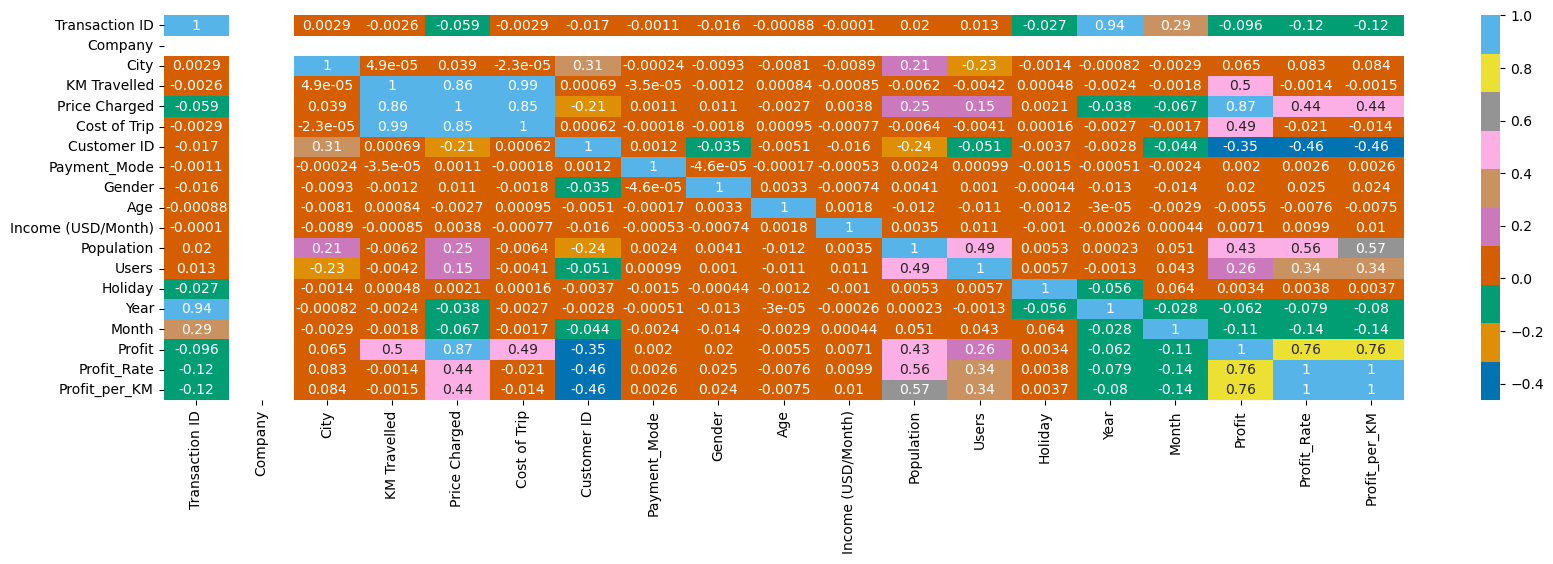

In [111]:
plt.figure(figsize = (20,5))
sns.heatmap(Yellow_cab.corr(),cmap = colors,annot = True);


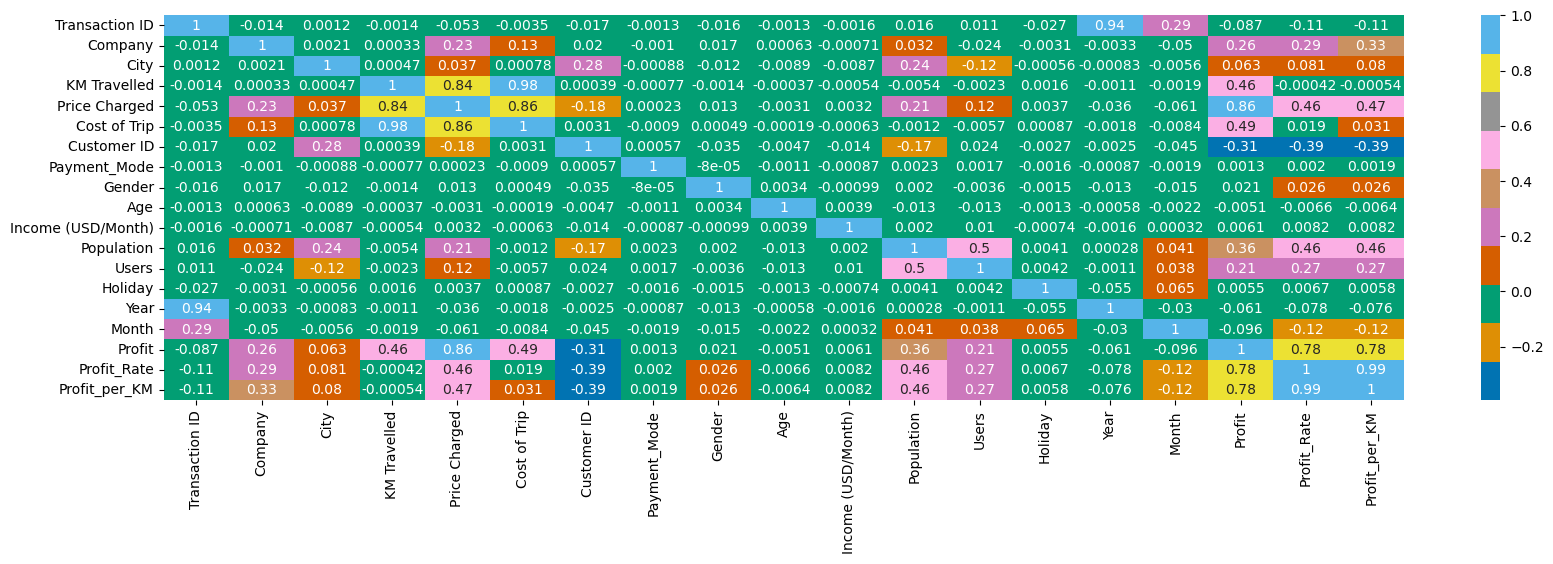

In [112]:
plt.figure(figsize = (20,5))
sns.heatmap(data_encoded.corr(),cmap = colors,annot = True);


#### "Which features have the most influence (positive or negative) on Profit for Pink Cab?"

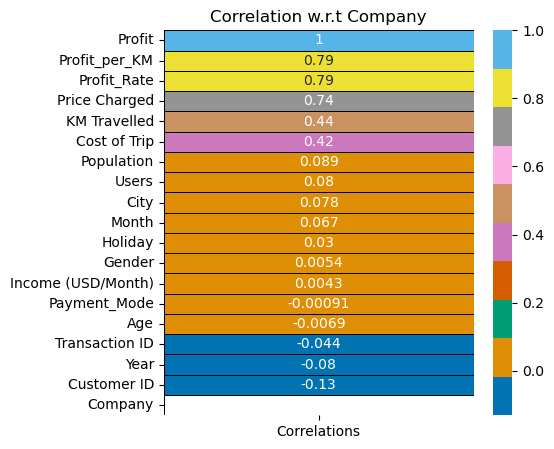

In [113]:
corr = Pink_cab.corrwith(Pink_cab['Profit']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Company');


#### "Which features have the most influence (positive or negative) on Profit for Yellow Cab?"

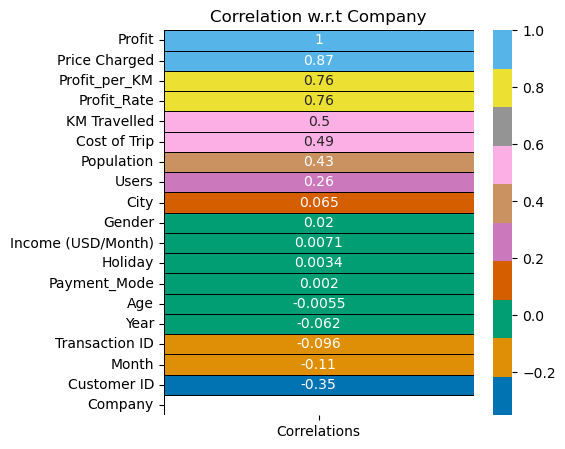

In [114]:
corr = Yellow_cab.corrwith(Yellow_cab['Profit']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Company');


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ' 24,701 '),
  Text(1, 0, ' 14,978 '),
  Text(2, 0, ' 80,021 '),
  Text(3, 0, ' 164,468 '),
  Text(4, 0, ' 22,157 '),
  Text(5, 0, ' 12,421 '),
  Text(6, 0, ' 144,132 '),
  Text(7, 0, ' 17,675 '),
  Text(8, 0, ' 9,270 '),
  Text(9, 0, ' 302,149 '),
  Text(10, 0, ' 12,994 '),
  Text(11, 0, ' 6,133 '),
  Text(12, 0, ' 3,643 '),
  Text(13, 0, ' 7,044 '),
  Text(14, 0, ' 69,995 '),
  Text(15, 0, ' 25,063 '),
  Text(16, 0, ' 27,247 '),
  Text(17, 0, ' 5,712 '),
  Text(18, 0, ' 127,001 ')])

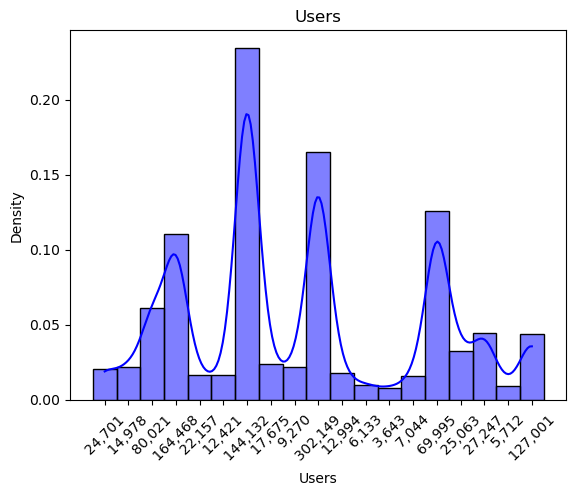

In [115]:
sns.histplot(Pink_cab_df["Users"], color='blue', kde=True, bins=20, stat='density')
plt.title('Users')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'ATLANTA GA'),
  Text(1, 0, 'AUSTIN TX'),
  Text(2, 0, 'BOSTON MA'),
  Text(3, 0, 'CHICAGO IL'),
  Text(4, 0, 'DALLAS TX'),
  Text(5, 0, 'DENVER CO'),
  Text(6, 0, 'LOS ANGELES CA'),
  Text(7, 0, 'MIAMI FL'),
  Text(8, 0, 'NASHVILLE TN'),
  Text(9, 0, 'NEW YORK NY'),
  Text(10, 0, 'ORANGE COUNTY'),
  Text(11, 0, 'PHOENIX AZ'),
  Text(12, 0, 'PITTSBURGH PA'),
  Text(13, 0, 'SACRAMENTO CA'),
  Text(14, 0, 'SAN DIEGO CA'),
  Text(15, 0, 'SEATTLE WA'),
  Text(16, 0, 'SILICON VALLEY'),
  Text(17, 0, 'TUCSON AZ'),
  Text(18, 0, 'WASHINGTON DC')])

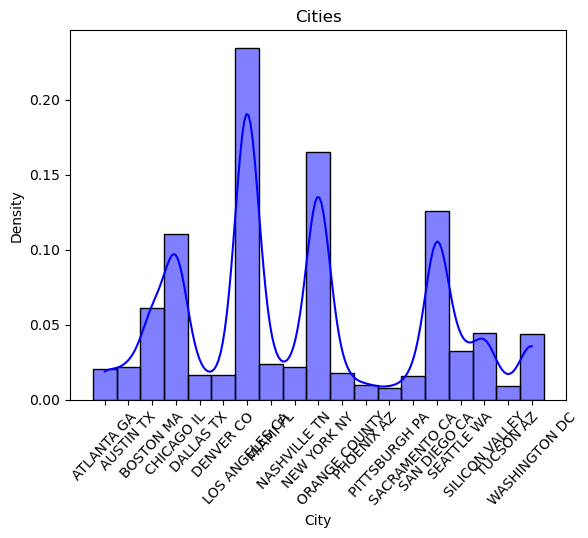

In [116]:
sns.histplot(Pink_cab_df["City"], color='blue', kde=True, bins=20, stat='density')
plt.title('Cities')
plt.xticks(rotation=47)

LOS ANGELES 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'ATLANTA GA'),
  Text(1, 0, 'AUSTIN TX'),
  Text(2, 0, 'BOSTON MA'),
  Text(3, 0, 'CHICAGO IL'),
  Text(4, 0, 'DALLAS TX'),
  Text(5, 0, 'DENVER CO'),
  Text(6, 0, 'LOS ANGELES CA'),
  Text(7, 0, 'MIAMI FL'),
  Text(8, 0, 'NASHVILLE TN'),
  Text(9, 0, 'NEW YORK NY'),
  Text(10, 0, 'ORANGE COUNTY'),
  Text(11, 0, 'PHOENIX AZ'),
  Text(12, 0, 'PITTSBURGH PA'),
  Text(13, 0, 'SACRAMENTO CA'),
  Text(14, 0, 'SAN DIEGO CA'),
  Text(15, 0, 'SEATTLE WA'),
  Text(16, 0, 'SILICON VALLEY'),
  Text(17, 0, 'TUCSON AZ'),
  Text(18, 0, 'WASHINGTON DC')])

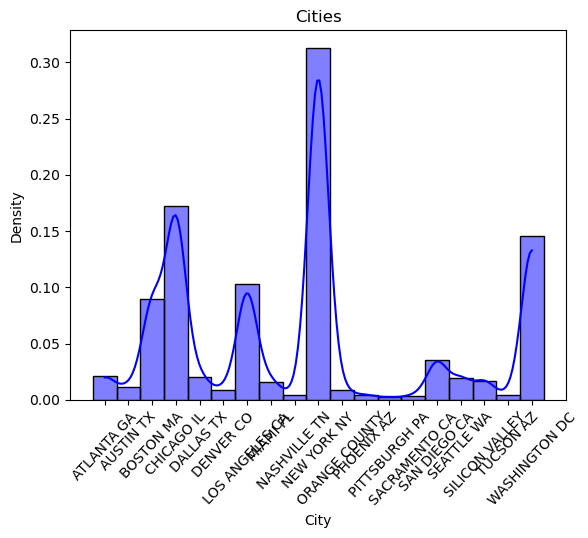

In [117]:
sns.histplot(Yellow_cab_df["City"], color='blue', kde=True, bins=20, stat='density')
plt.title('Cities')
plt.xticks(rotation=47)

NEW YORK NY